# **FINAL PROJECT : Machine Learning Of Car Insurance Claim**

## **ML Preperation**

- Import Package
- Dataset (Import, Describe, Info)
- Pre-Cleansing (Re-Formating & Cleansing Preperation)
- Split Feature Category & Numeric

### **Import Package**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### **Dataset** (Import, Describe, & Info)

In [ ]:
data = pd.read_csv('file(3).csv')
data.sample(5)

ID  KIDSDRIV   AGE  HOMEKIDS  ...  MVR_PTS CLM_AMT CAR_AGE CLAIM_FLAG
1011  351272937         0  24.0         4  ...        3      $0     6.0          0
1054  387139563         0  37.0         1  ...        5      $0    22.0          0
8656  876968470         0  53.0         0  ...        1      $0    12.0          0
1436   40478781         1  37.0         1  ...        0      $0     1.0          0
482   247833708         0  43.0         3  ...        4      $0     1.0          0

[5 rows x 25 columns]

In [ ]:
data.describe()

ID      KIDSDRIV  ...      CAR_AGE    CLAIM_FLAG
count  1.030200e+04  10302.000000  ...  9663.000000  10302.000000
mean   4.956631e+08      0.169288  ...     8.298148      0.266550
std    2.864675e+08      0.506512  ...     5.714450      0.442177
min    6.317500e+04      0.000000  ...    -3.000000      0.000000
25%    2.442869e+08      0.000000  ...     1.000000      0.000000
50%    4.970043e+08      0.000000  ...     8.000000      0.000000
75%    7.394551e+08      0.000000  ...    12.000000      1.000000
max    9.999264e+08      4.000000  ...    28.000000      1.000000

[8 rows x 11 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

### **Pre-Cleansing**

#### Re-Format Value (Cleansing)

In [ ]:
data['INCOME'] = data['INCOME'].str.replace('$' , '')
data['INCOME'] = data['INCOME'].str.replace(',' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace('$' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace(',' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace('$' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace(',' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace('$' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace(',' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace('$' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace(',' , '')
data['MSTATUS'] = data['MSTATUS'].str.replace('z_' , '')
data['GENDER'] = data['GENDER'].str.replace('z_' , '')
data['CAR_TYPE'] = data['CAR_TYPE'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('<' , '')
data['OCCUPATION'] = data['OCCUPATION'].str.replace('z_' , '')

In [ ]:
data.sample(3)

ID  KIDSDRIV   AGE  HOMEKIDS  ...  MVR_PTS CLM_AMT CAR_AGE CLAIM_FLAG
1179  723410690         0  35.0         0  ...        0       0     1.0          0
5476  988703393         0  29.0         3  ...        0       0     9.0          0
3577  108036736         0  52.0         0  ...        4       0    22.0          0

[3 rows x 25 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [ ]:
data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']] = data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']].apply(pd.to_numeric)
data.info() #Mengubah datatype ke Numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  int64  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  int64  
 19  CLM_FREQ    10302 non-nul

#### Cleansing Preparation

In [ ]:
data.isna().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

Missing Value dari beberapa Feature akan dilakukan :
1. Categorical : 'Occupation' di-replace oleh Modus
2. Numeric : Menggunakan KNN Imputer

In [ ]:
data.duplicated().sum()

1

Ditemukan 1 row duplikat pada dataset.

In [ ]:
data.duplicated(subset='ID').sum()

1549

Ditemukan 1549 value duplikat pada feature `ID`.

### **Feature Category & Numeric**

In [ ]:
nums = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','CLAIM_FLAG']
cats = ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']

In [ ]:
data[nums].describe()

KIDSDRIV           AGE  ...      CAR_AGE    CLAIM_FLAG
count  10302.000000  10295.000000  ...  9663.000000  10302.000000
mean       0.169288     44.837397  ...     8.298148      0.266550
std        0.506512      8.606445  ...     5.714450      0.442177
min        0.000000     16.000000  ...    -3.000000      0.000000
25%        0.000000     39.000000  ...     1.000000      0.000000
50%        0.000000     45.000000  ...     8.000000      0.000000
75%        0.000000     51.000000  ...    12.000000      1.000000
max        4.000000     81.000000  ...    28.000000      1.000000

[8 rows x 15 columns]

In [ ]:
data[cats].describe()

PARENT1 MSTATUS GENDER    EDUCATION  ...  CAR_USE CAR_TYPE RED_CAR REVOKED
count    10302   10302  10302        10302  ...    10302    10302   10302   10302
unique       2       2      2            4  ...        2        6       2       2
top         No     Yes      F  High School  ...  Private      SUV      no      No
freq      8959    6188   5545         4467  ...     6513     2883    7326    9041

[4 rows x 9 columns]

## **First EDA** (Sampling by *Slovin*)

- Sampling Method (*Slovin*)
- Dataset Sample (Info & Describe)
- EDA & Data Vizualization

### **Sampling Method (*Slovin*)**

In [ ]:
N = len(data)
e = 0.025
n = round(N/(1+N*(e**2)))
print(n)

1385


### **Dataset Sample (Info & Describe)**

In [ ]:
sample = data.copy()
sample = sample.dropna()
data2 = sample.sample(n, random_state = 123)
data2.sample(3)

ID  KIDSDRIV   AGE  ...  CLM_AMT  CAR_AGE  CLAIM_FLAG
4090  130158352         1  41.0  ...        0     11.0           0
959   384934557         0  37.0  ...        0      8.0           0
6718  597035878         1  56.0  ...        0      1.0           0

[3 rows x 25 columns]

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 631 to 3587
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1385 non-null   int64  
 1   KIDSDRIV    1385 non-null   int64  
 2   AGE         1385 non-null   float64
 3   HOMEKIDS    1385 non-null   int64  
 4   YOJ         1385 non-null   float64
 5   INCOME      1385 non-null   float64
 6   PARENT1     1385 non-null   object 
 7   HOME_VAL    1385 non-null   float64
 8   MSTATUS     1385 non-null   object 
 9   GENDER      1385 non-null   object 
 10  EDUCATION   1385 non-null   object 
 11  OCCUPATION  1385 non-null   object 
 12  TRAVTIME    1385 non-null   int64  
 13  CAR_USE     1385 non-null   object 
 14  BLUEBOOK    1385 non-null   int64  
 15  TIF         1385 non-null   int64  
 16  CAR_TYPE    1385 non-null   object 
 17  RED_CAR     1385 non-null   object 
 18  OLDCLAIM    1385 non-null   int64  
 19  CLM_FREQ    1385 non-null

In [ ]:
data2[nums].describe()

KIDSDRIV          AGE  ...      CAR_AGE   CLAIM_FLAG
count  1385.000000  1385.000000  ...  1385.000000  1385.000000
mean      0.197834    44.634657  ...     7.971841     0.262094
std       0.555967     8.632809  ...     5.488552     0.439932
min       0.000000    16.000000  ...     0.000000     0.000000
25%       0.000000    39.000000  ...     1.000000     0.000000
50%       0.000000    45.000000  ...     8.000000     0.000000
75%       0.000000    51.000000  ...    12.000000     1.000000
max       3.000000    73.000000  ...    26.000000     1.000000

[8 rows x 15 columns]

In [ ]:
data[cats].describe()

PARENT1 MSTATUS GENDER    EDUCATION  ...  CAR_USE CAR_TYPE RED_CAR REVOKED
count    10302   10302  10302        10302  ...    10302    10302   10302   10302
unique       2       2      2            4  ...        2        6       2       2
top         No     Yes      F  High School  ...  Private      SUV      no      No
freq      8959    6188   5545         4467  ...     6513     2883    7326    9041

[4 rows x 9 columns]

## **EDA & Data Vizualization**

#### Descriptive Analysis
Berikut analisis deskriptif sederhana dari dataset :

In [ ]:
data[nums].describe()

KIDSDRIV           AGE  ...      CAR_AGE    CLAIM_FLAG
count  10302.000000  10295.000000  ...  9663.000000  10302.000000
mean       0.169288     44.837397  ...     8.298148      0.266550
std        0.506512      8.606445  ...     5.714450      0.442177
min        0.000000     16.000000  ...    -3.000000      0.000000
25%        0.000000     39.000000  ...     1.000000      0.000000
50%        0.000000     45.000000  ...     8.000000      0.000000
75%        0.000000     51.000000  ...    12.000000      1.000000
max        4.000000     81.000000  ...    28.000000      1.000000

[8 rows x 15 columns]

Beberapa hasil pengamatan dari *statistical summary* di atas, diketahui :
* Distribusi nilai di kolom `AGE`, `YOJ`, `TRAVTIME`, dan `CAR_AGE` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira-kira tepat di tengah2 Q1 - Q3)
* Feature `KIDSDRIV`, `HOMEKIDS`, `INCOME`, `BLUEBOOK`, `TIF`, `MVR_PTS`, `CLM_AMT` memiliki distribusi nilai *Positively Skwed*.
* Feature `HOME_VAL`, `OLDCLAIM`, dan `CLM_FREQ` memiliki distribusi nilai *Negatively Skwed*.
* Feature target `CLAIM_FLAG` memiliki mean 0.275 artinya kebanyakan klaim menuju 0 (Tidak mengajukan klaim).

In [ ]:
data[cats].describe()

PARENT1 MSTATUS GENDER    EDUCATION  ...  CAR_USE CAR_TYPE RED_CAR REVOKED
count    10302   10302  10302        10302  ...    10302    10302   10302   10302
unique       2       2      2            4  ...        2        6       2       2
top         No     Yes      F  High School  ...  Private      SUV      no      No
freq      8959    6188   5545         4467  ...     6513     2883    7326    9041

[4 rows x 9 columns]

### Univariate Analysis

**Numerical**

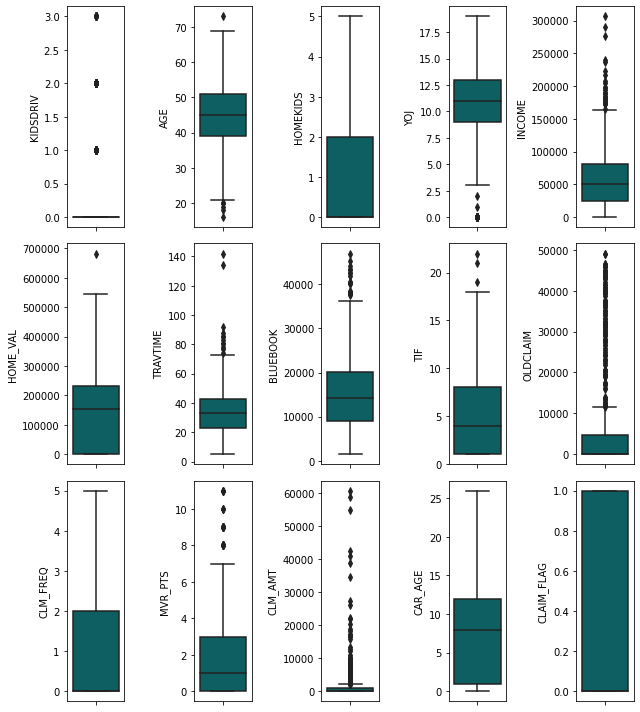

In [ ]:
plt.figure(figsize=(9, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.boxplot(y=data2[nums[i]], color='#006C6F', orient='v')
    plt.tight_layout()

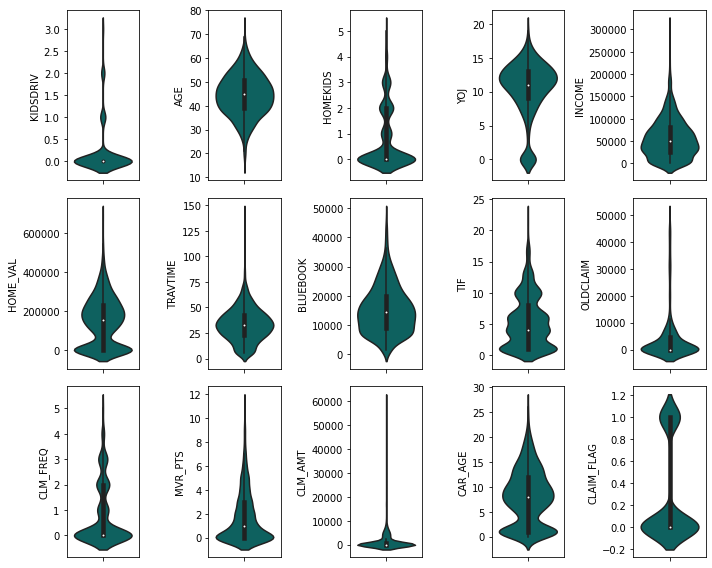

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.violinplot(y=data2[nums[i]], color='#006F6C', orient='v')
    plt.tight_layout()

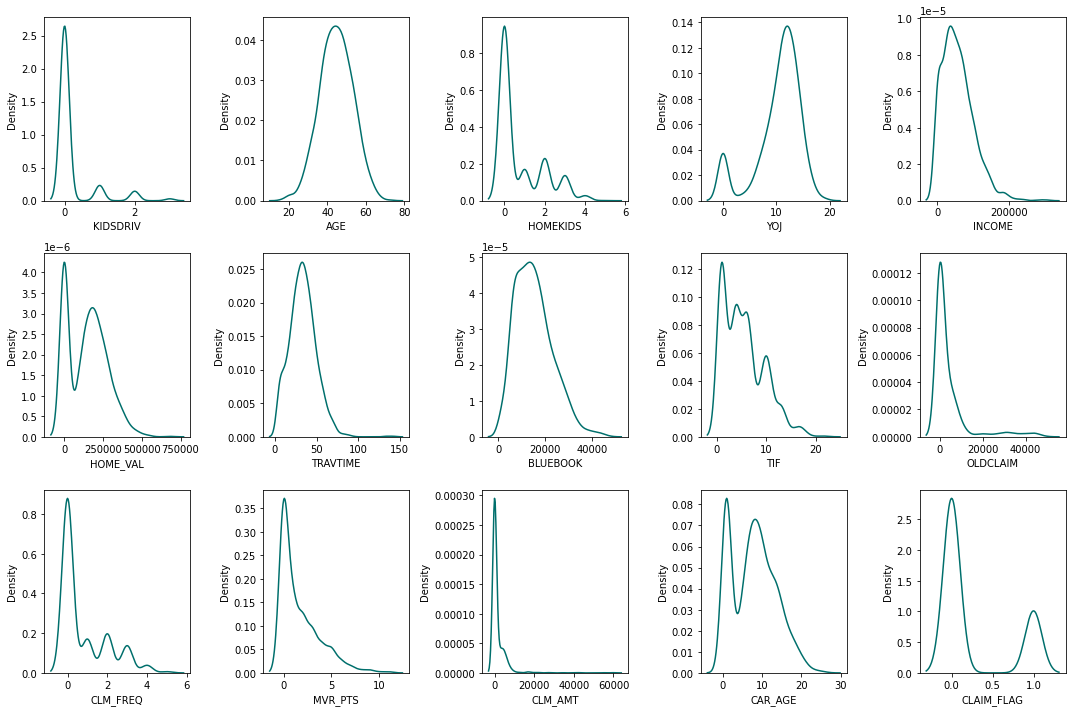

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.kdeplot(data2[nums[i]], color='#006F6C')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Distribusi nilai pada feature `AGE`, `YOJ`, `TRAVTIME`, dan `CAR_AGE` tergolong normal.
* Feature `KIDSDRIV`, `HOMEKIDS`, `INCOME`, `BLUEBOOK`, `TIF`, `MVR_PTS`, `CLM_AMT` memiliki distribusi nilai *Positively Skwed*.
* Feature `HOME_VAL`, `OLDCLAIM`, dan `CLM_FREQ` memiliki distribusi nilai *Negatively Skwed*.
*Feature target `CLAIM_FLAG` memiliki distribusi bimodal.


**Categorical**

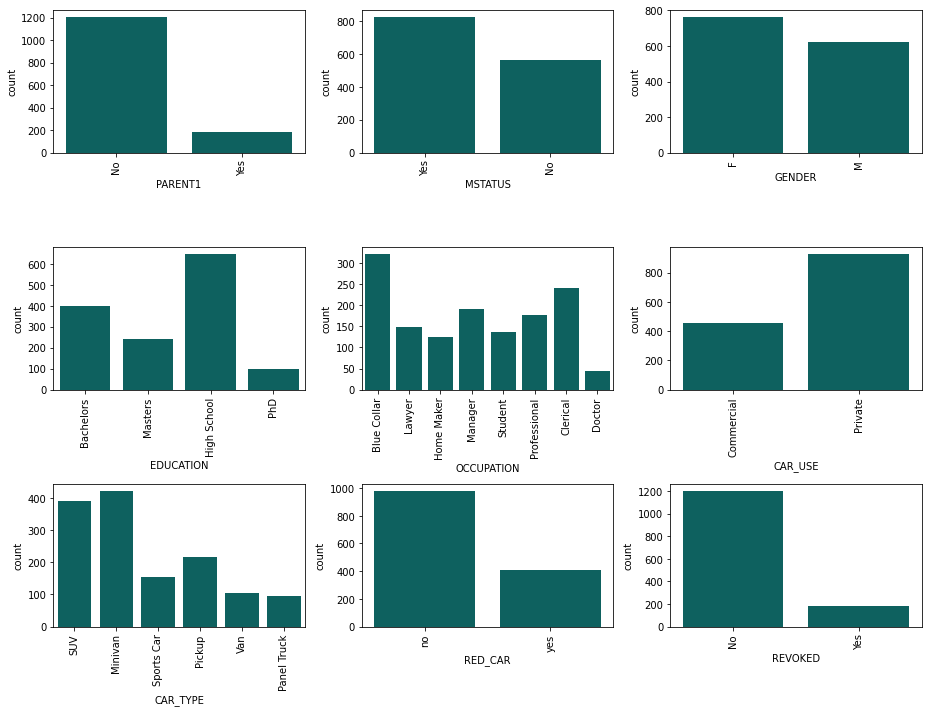

In [ ]:
plt.figure(figsize=(13, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data2[cats[i]], color='#006F6C', orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

### Multivariate Analysis

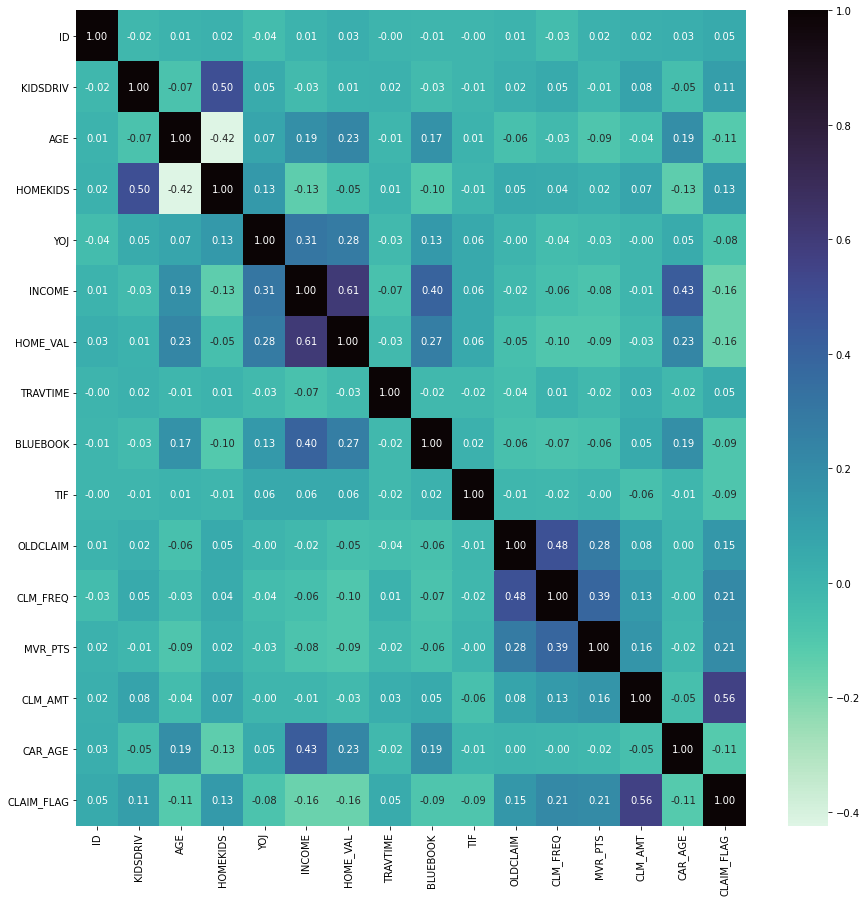

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr(), cmap='mako_r', annot=True,fmt='.2f');

Dari correlation heatmap di atas dapat dilihat bahwa:

* Feature target yaitu `CLAIM_FLAG`, memiliki korelasi positif yang lemah dengan feature `KIDSDRIV`, `OLDCLAIM`,`CLAIM_FREQ`,`MVR_PTS`. Selain korelasi positif, ada juga korelasi negatif yang lemah antara `CLAIM_FLAG` dengan feature `INCOME` `HOME_VAL`, dan `CAR_AGE`.
* `CLAIM_FLAG` juga memiliki korelasi positif yang kuat dengan `CLM_AMT`.
* Selain itu terdapat beberapa feature `HOME_VAL` dan `INCOME` yang diduga sebagai ***Redundant***.

<Figure size 3600x3600 with 0 Axes>

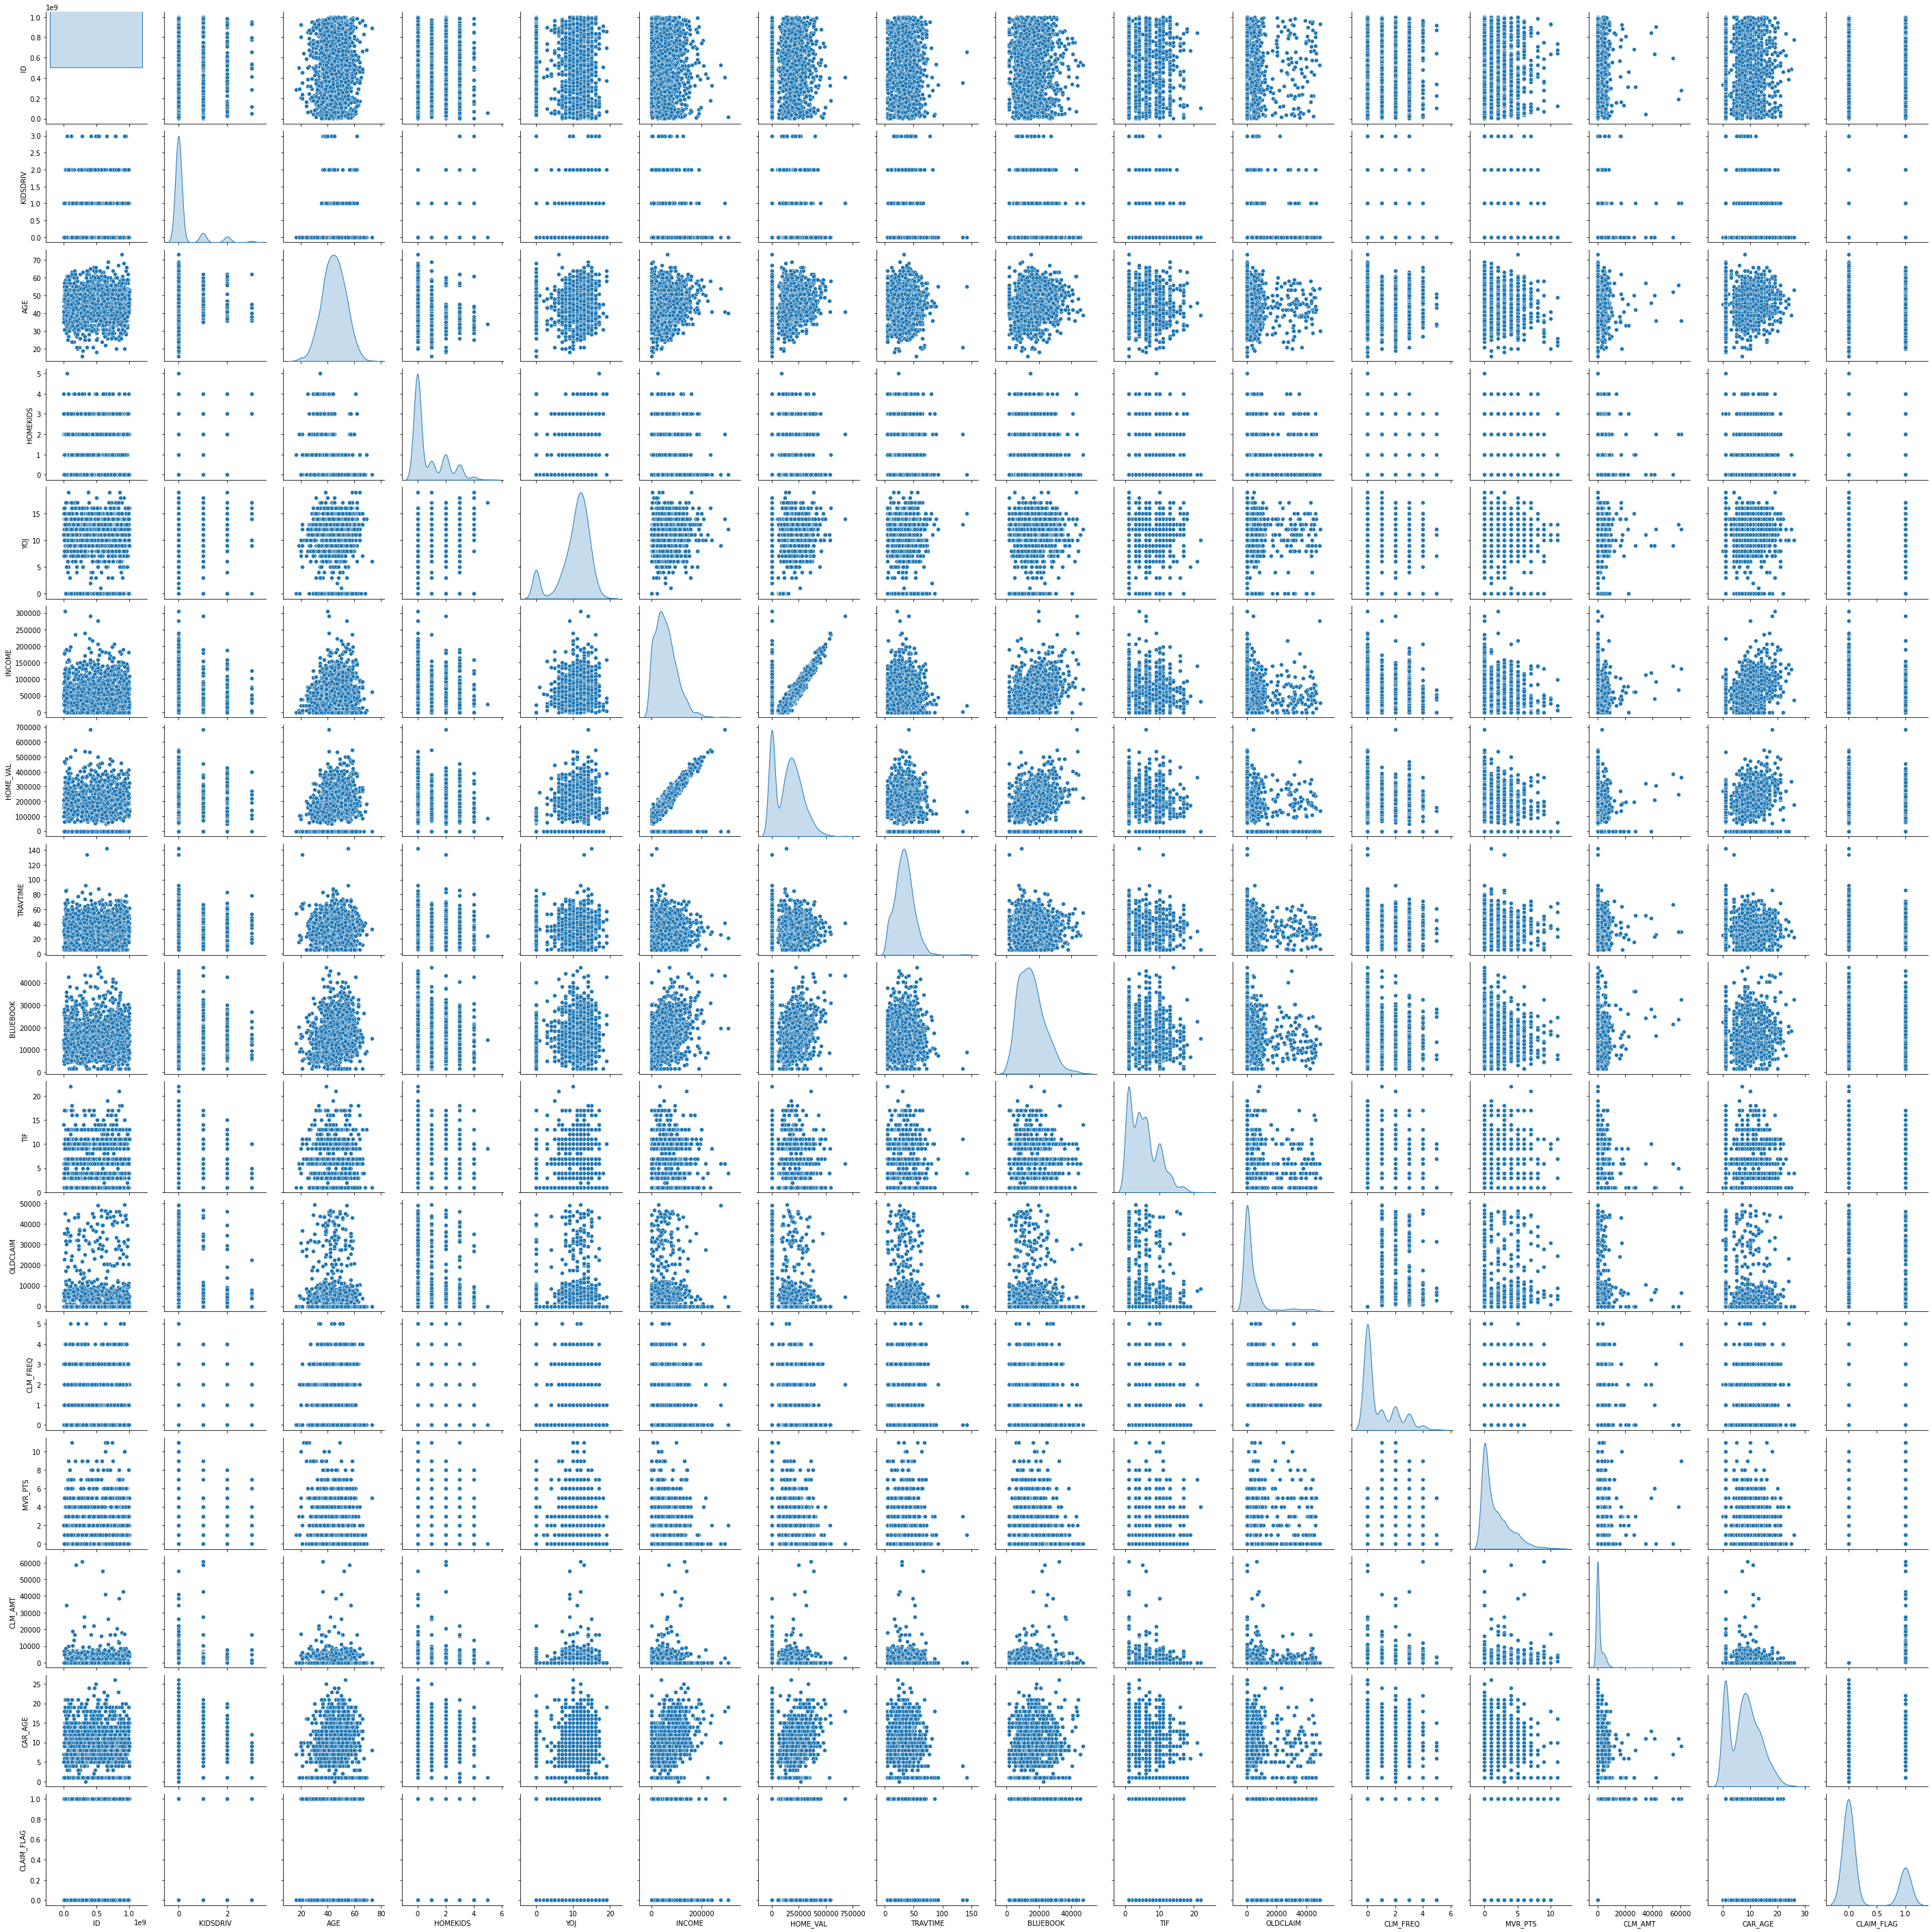

In [ ]:
plt.figure(figsize=(50, 50))
sns.pairplot(data2, diag_kind='kde', palette='mako_r')

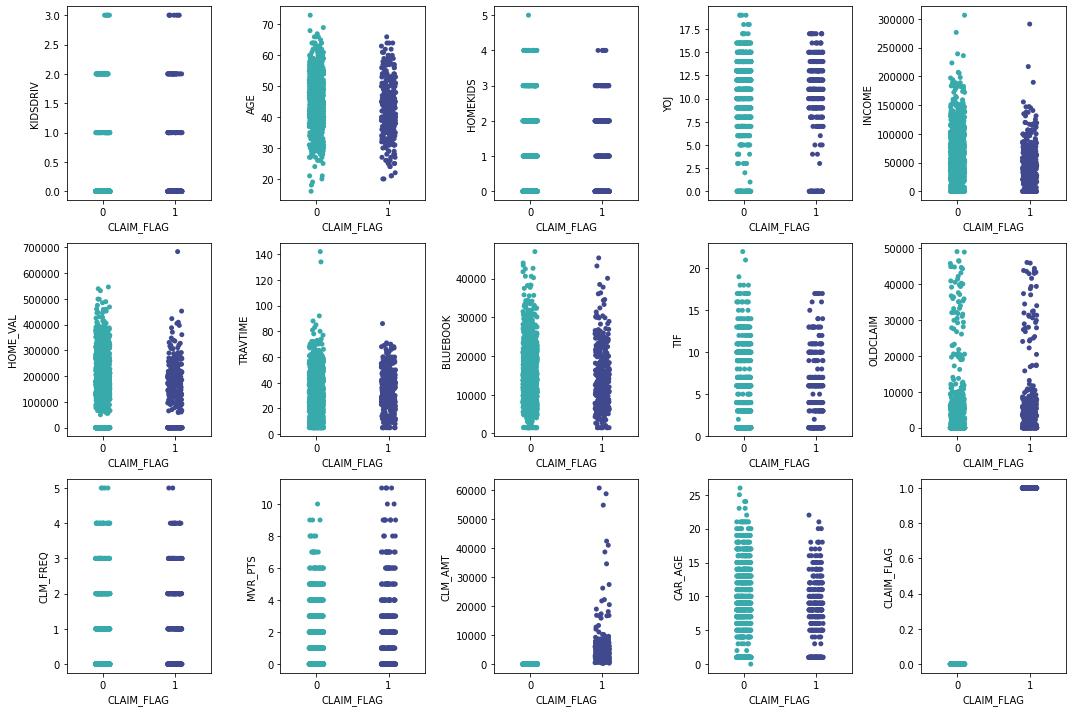

In [ ]:
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 5, i+1)
    sns.stripplot(ax=ax, data=data2, x='CLAIM_FLAG', y=nums[i], palette='mako_r')
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

***EDA Conclusion***
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak terlihat adanya kecacatan.
* Namun masih terdapat value yang kosong/hilang, dan akan dilakukan pengolahan data lebih lanjut di Pre-Processing.
* Beberapa feature memiliki distribusi data yang *skewed*. Mengingat jika menggunakan data sebagai feature untuk model Machine Learning  memerlukan data yang baiknya terdistribusi normal, maka dibutuhkan normalisasi distribusi data yang juga akan diolah lebih lanjut di Pre-Processing.
* `CLM_AMT` memiliki korelasi yang positif dan kuat dengan `CLAIM_FLAG`, maka feature tersebut sangat berguna untuk dijadikan acuan feature lainnya.

###**EDA, Visualization, and Insight**

####Response to User Profile (Gender, Age, Education, Occupation, Years of Join, Marriage Status, and Single Parent)

#####Gender to Feature target and Others

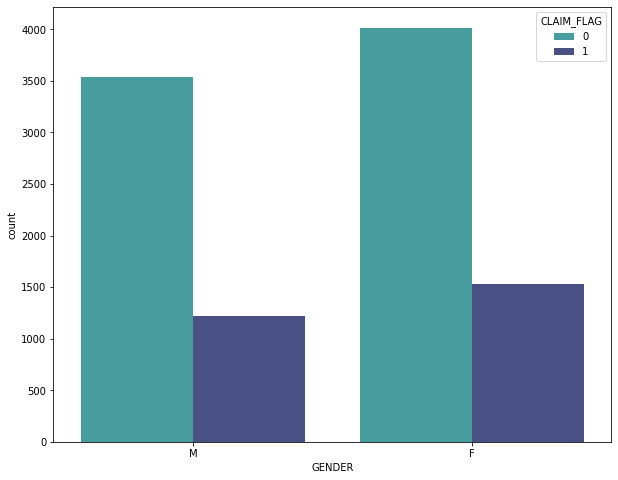

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='GENDER', hue='CLAIM_FLAG', data=data, palette='mako_r');

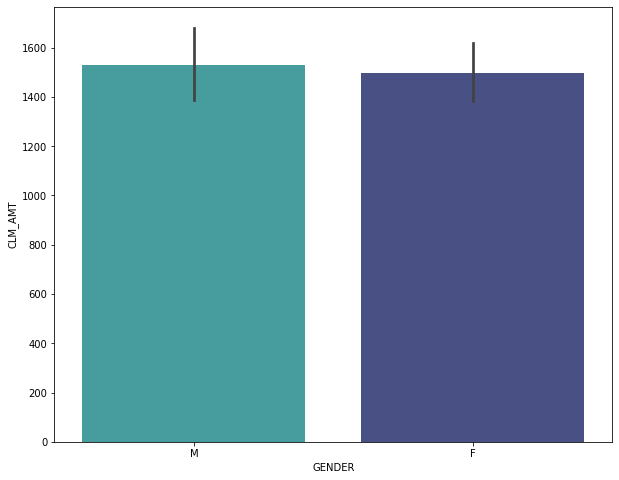

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='CLM_AMT', data=data, palette='mako_r',);

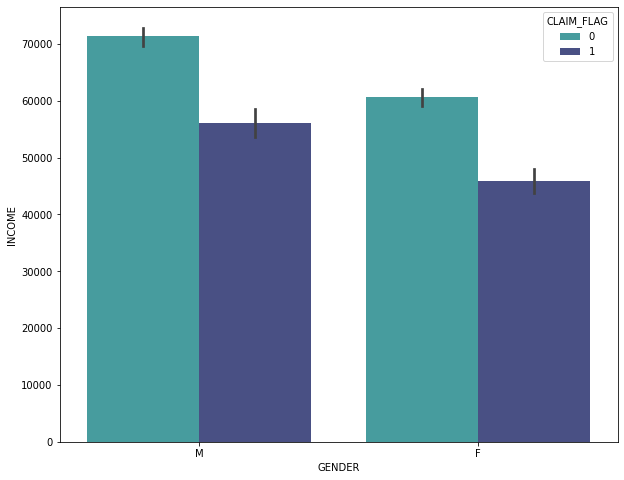

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='INCOME', hue='CLAIM_FLAG', data=data, palette='mako_r',);

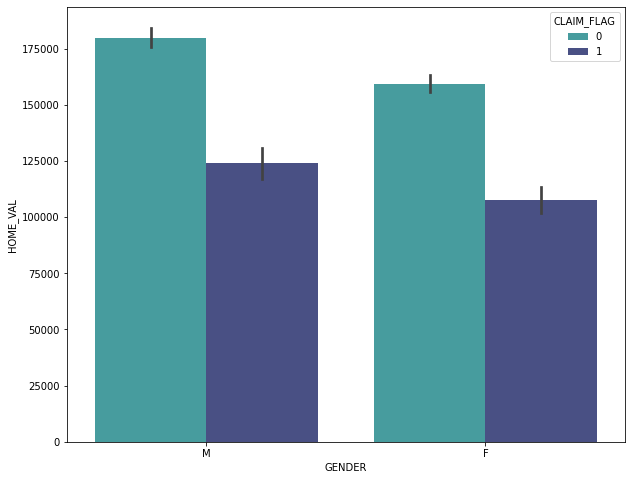

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='HOME_VAL', hue='CLAIM_FLAG', data=data, palette='mako_r',);

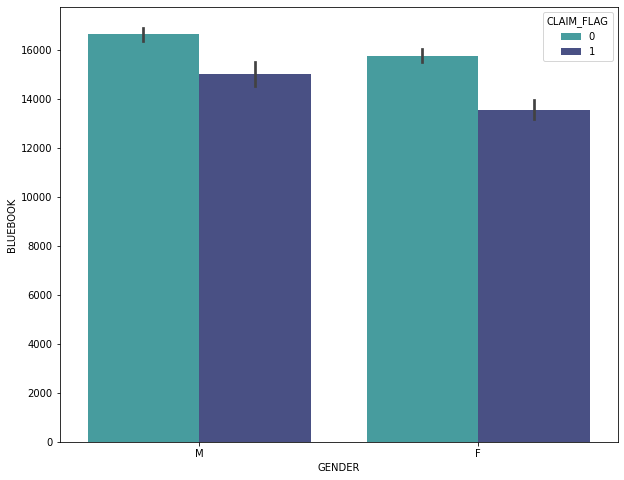

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='BLUEBOOK', hue='CLAIM_FLAG', data=data, palette='mako_r',);

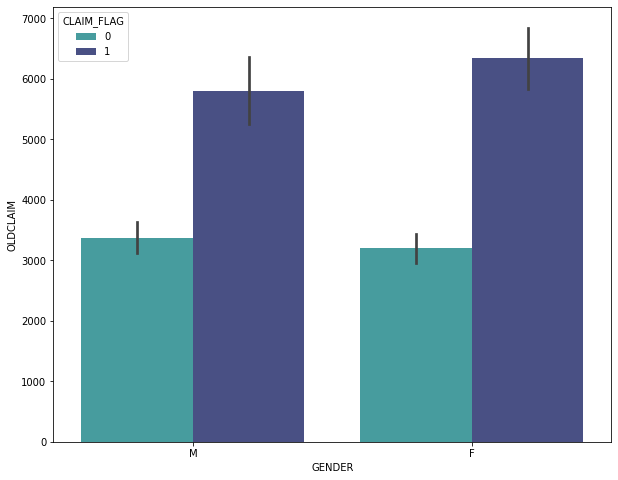

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='GENDER', y='OLDCLAIM', hue='CLAIM_FLAG', data=data, palette='mako_r',);

##### Years of Join to Feature target and Others

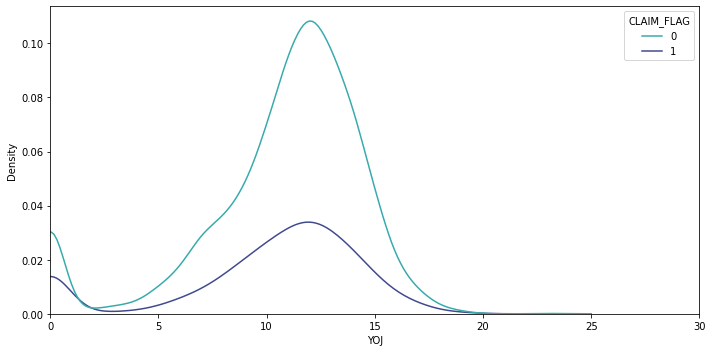

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=data, x="YOJ", hue="CLAIM_FLAG", palette='mako_r')

plt.xlim(0,30)

plt.tight_layout()

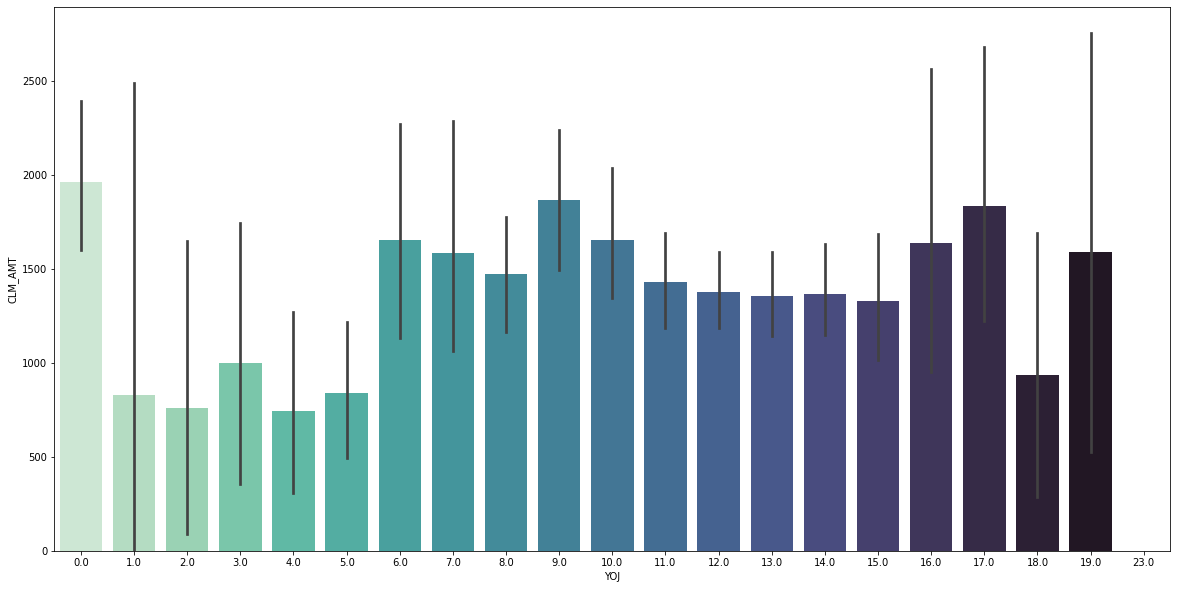

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='CLM_AMT', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='OLDCLAIM', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='INCOME', data=data, palette='mako_r',);

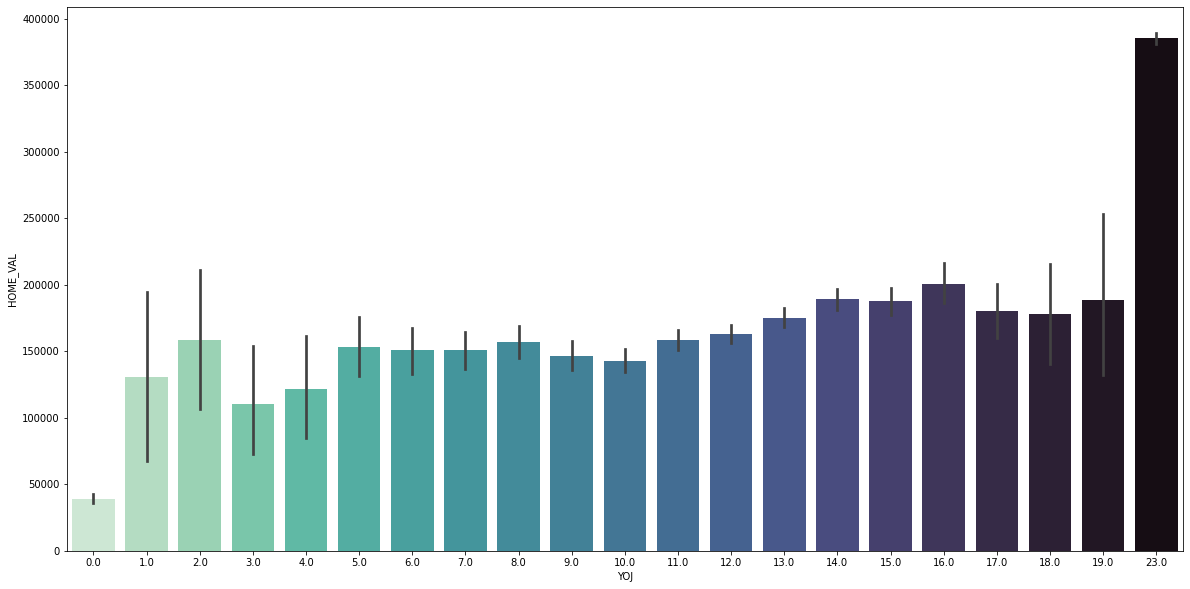

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='HOME_VAL', data=data, palette='mako_r',);

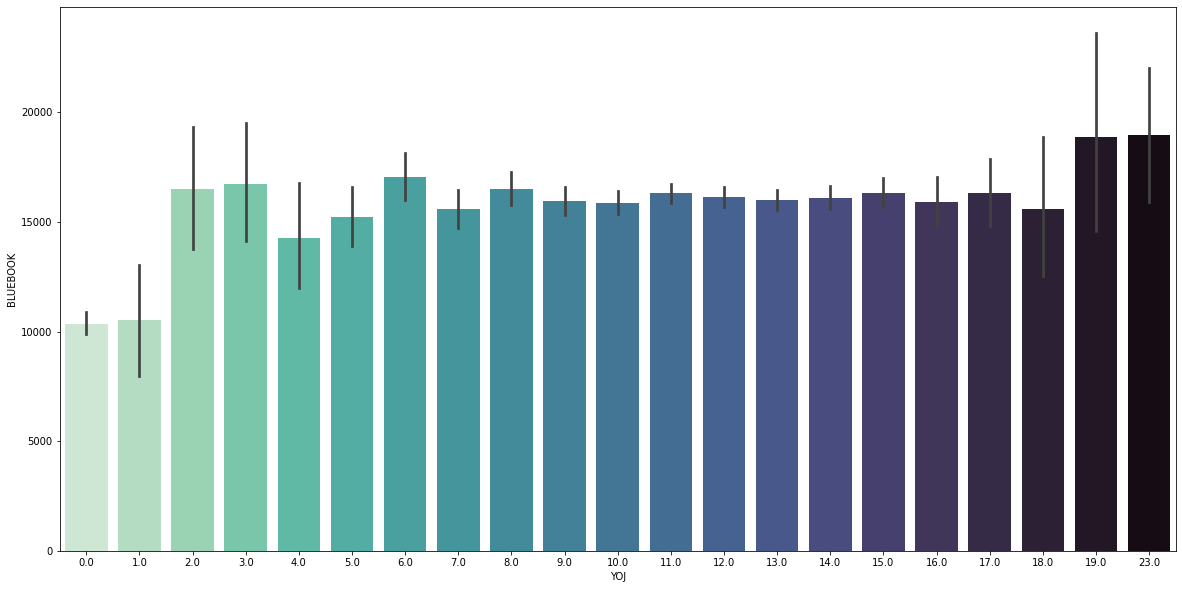

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='YOJ', y='BLUEBOOK', data=data, palette='mako_r',);

##### Age to Feature target and Others

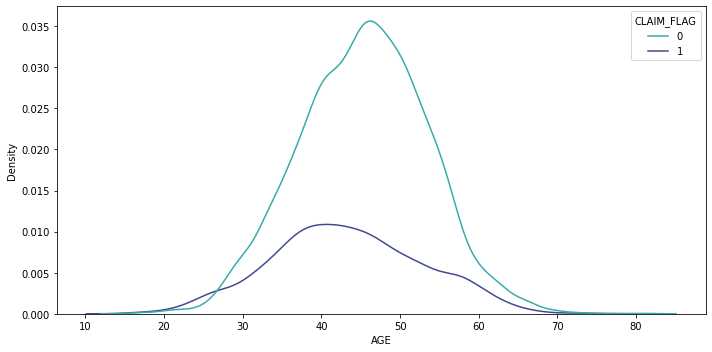

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=data, x="AGE", hue="CLAIM_FLAG", palette='mako_r')

plt.tight_layout()

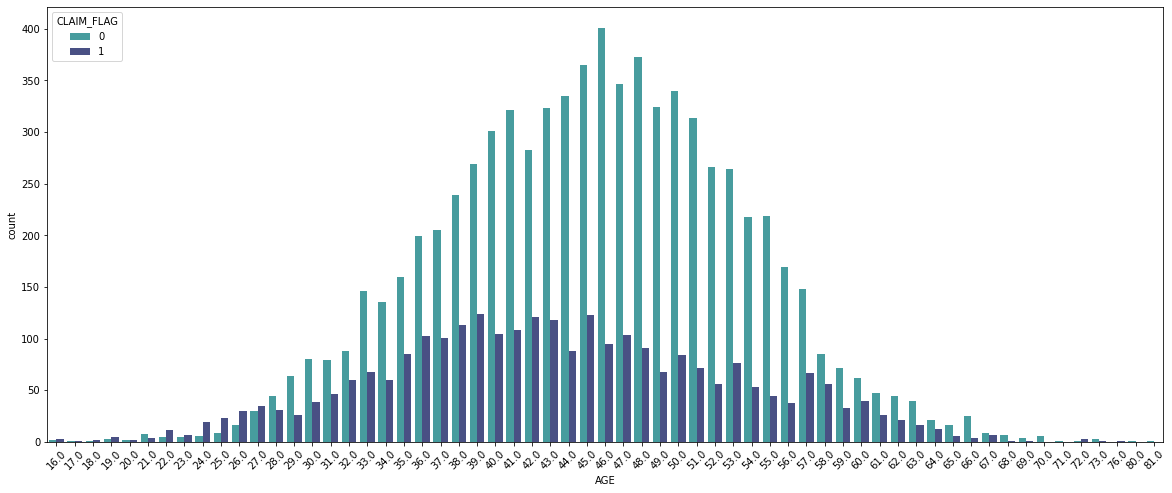

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE', hue='CLAIM_FLAG', data=data, palette='mako_r')
plt.xticks(rotation=45);

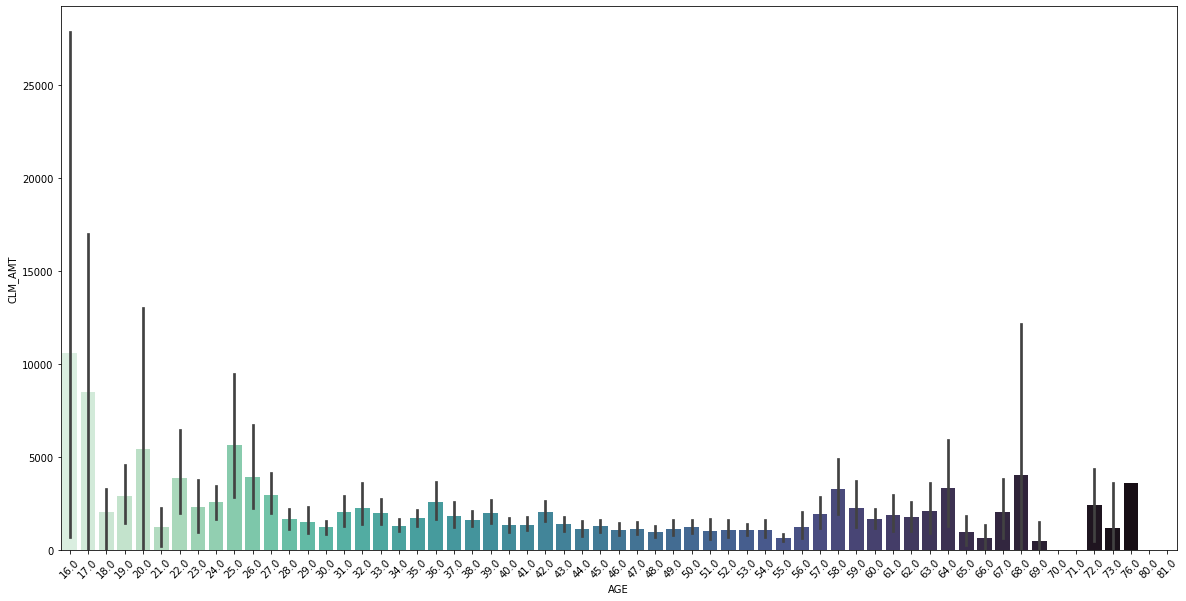

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

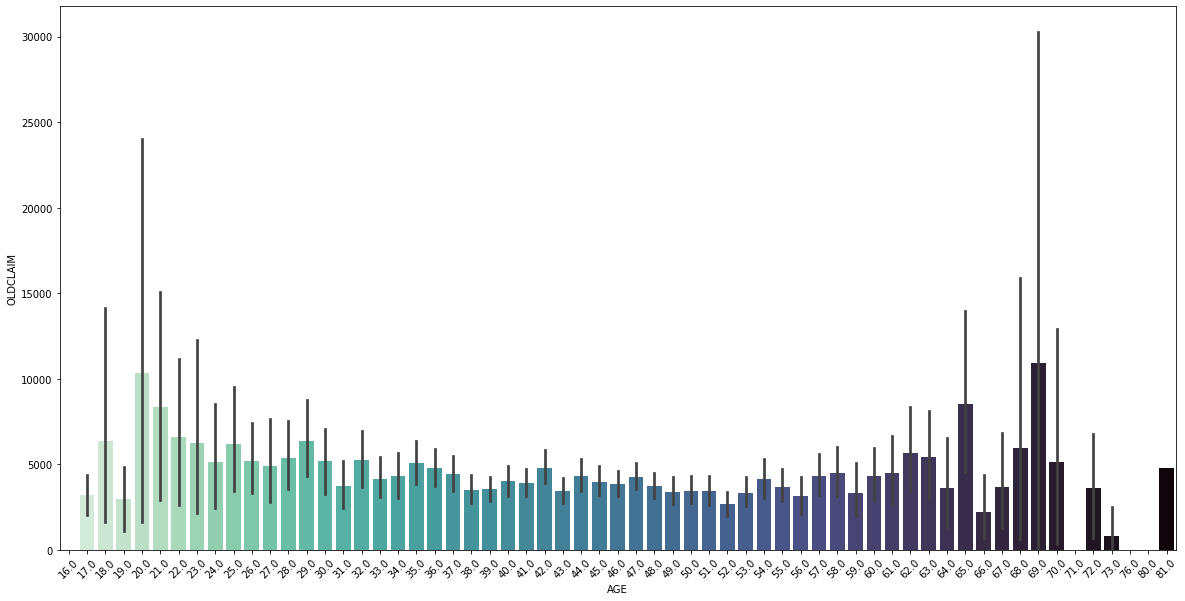

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

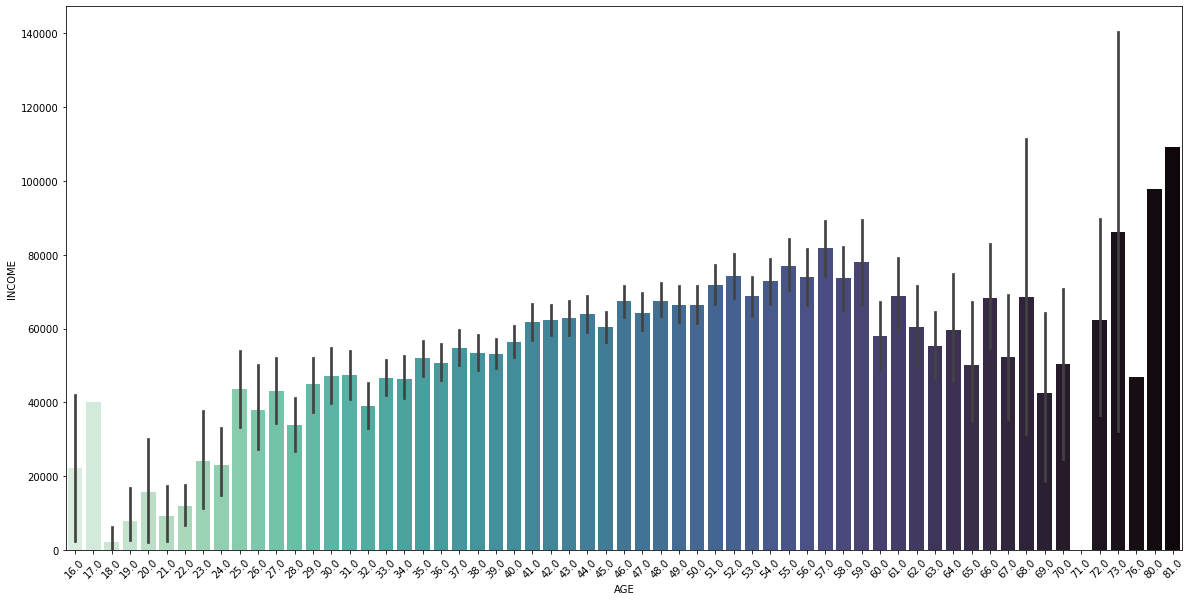

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

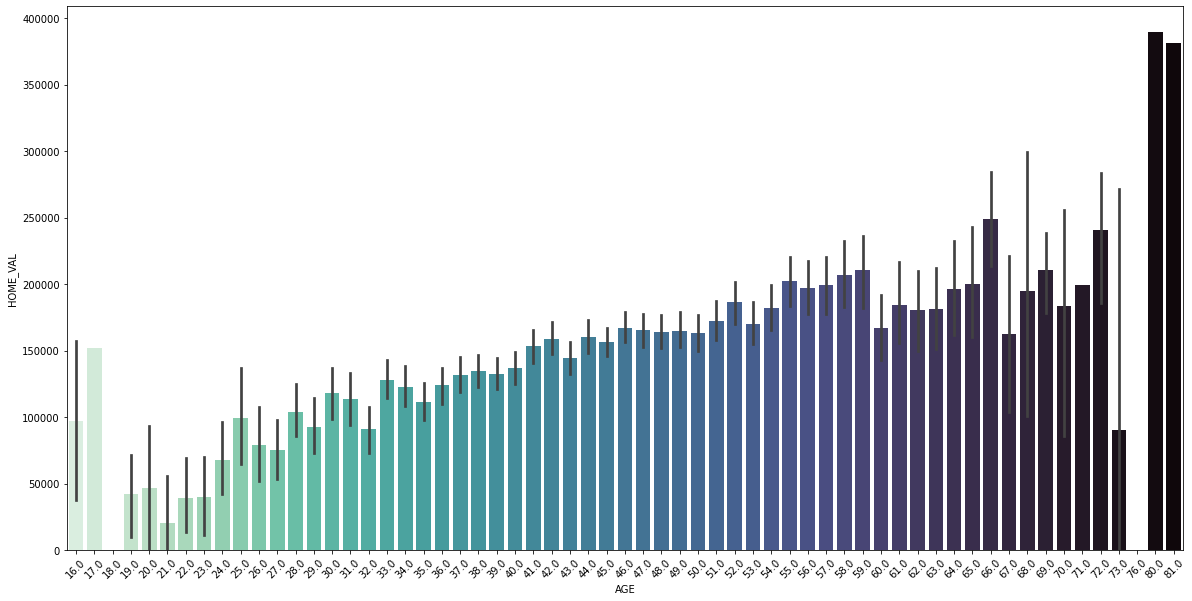

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

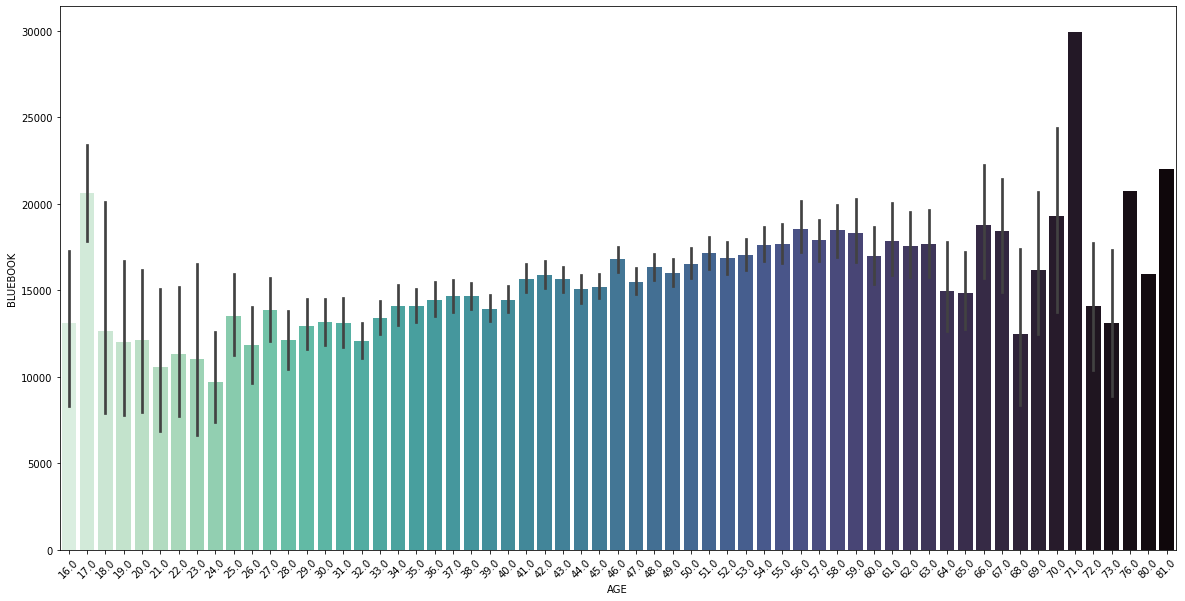

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Education to Feature target and Others

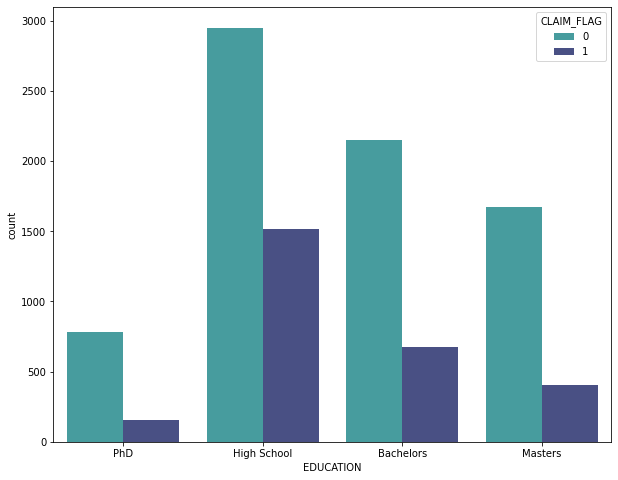

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='EDUCATION', hue='CLAIM_FLAG', data=data, palette='mako_r',);

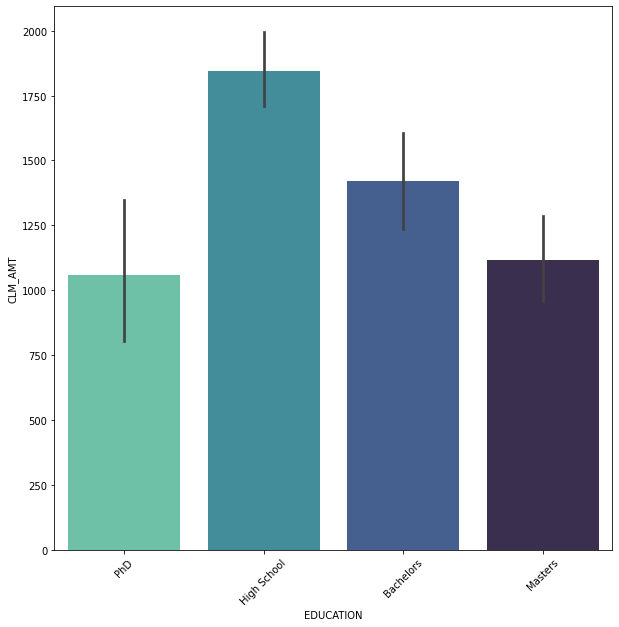

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

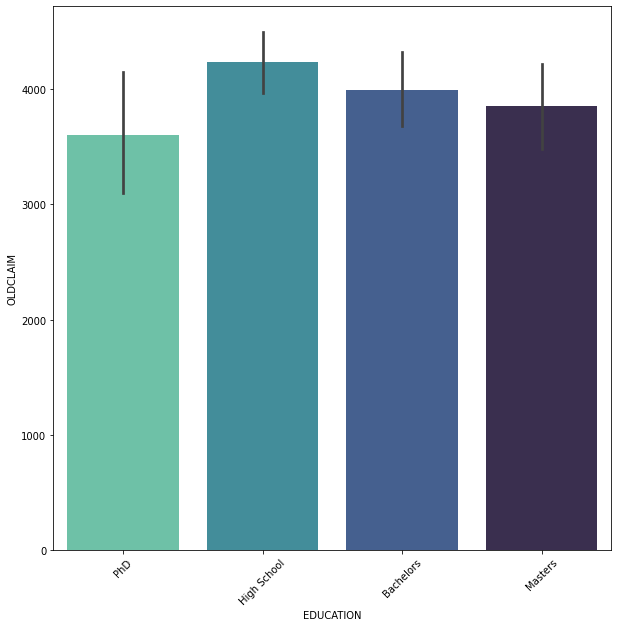

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

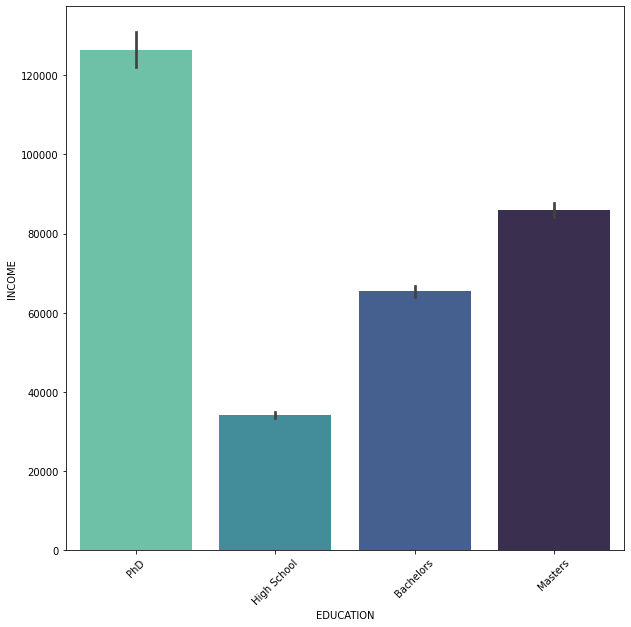

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

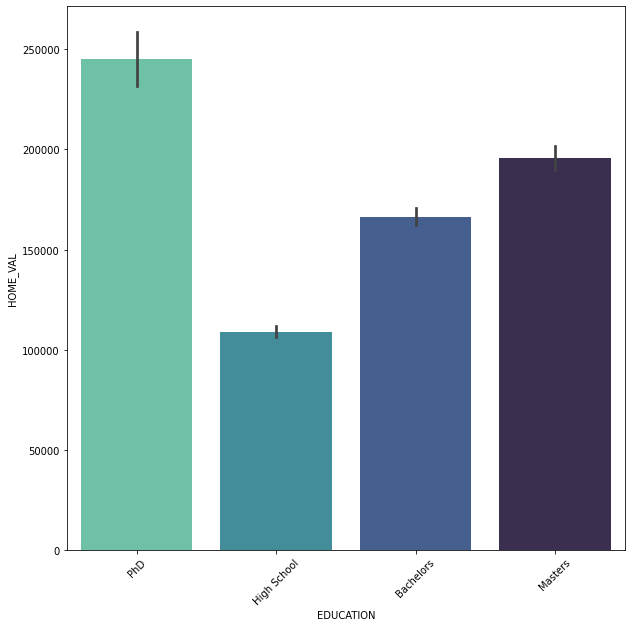

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

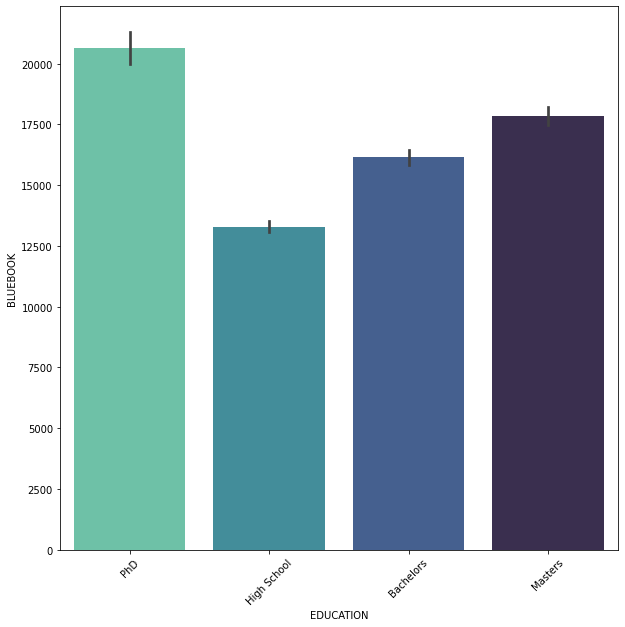

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='EDUCATION', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Occupation to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='OCCUPATION', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='INCOME', data=data, palette='mako_r')
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='OCCUPATION', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Marriage Status to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='MSTATUS', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='MSTATUS', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Single Parent to Feature target and Others

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='PARENT1', hue='CLAIM_FLAG', data=data, palette='mako_r',);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='CLM_AMT', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='PARENT1', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

### Response Claim Frequency to Feature Target

In [ ]:
data_eda = data.copy()

In [ ]:
data_eda['CLM_FREQ'].value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

In [ ]:
def group_freq(x):
    if x['CLM_FREQ'] == 0:
        frequency = 'low'
    elif x['CLM_FREQ'] == 1:
        frequency = 'low'
    elif x['CLM_FREQ'] == 2:
        frequency = 'medium'
    elif x['CLM_FREQ'] == 3:
        frequency = 'medium'
    elif x['CLM_FREQ'] == 4:
        frequency = 'high'
    else:
        frequency = 'high'
    return frequency

In [ ]:
data_eda['CLAIM_FREQ_GROUP'] = data_eda.apply(lambda x: group_freq(x), axis = 1)

In [ ]:
data_eda['CLAIM_FREQ_GROUP'].value_counts()

low       7571
medium    2484
high       247
Name: CLAIM_FREQ_GROUP, dtype: int64

In [ ]:
clmfreq_distribution = data_eda.groupby(['CLAIM_FREQ_GROUP', 'CLAIM_FLAG']).count()[['ID']]

clmfreq = data_eda.groupby(['CLAIM_FREQ_GROUP']).count()[['ID']]

clmfreq_distribution['percentage'] = clmfreq_distribution.div(clmfreq, level = 'CLAIM_FREQ_GROUP') * 100
clmfreq_distribution = clmfreq_distribution.reset_index()
clmfreq_distribution.columns = ['CLAIM_FREQ_GROUP', 'CLAIM_FLAG', '#of Customers', 'percentage']
clmfreq_distribution

CLAIM_FREQ_GROUP  CLAIM_FLAG  #of Customers  percentage
0             high           0            147   59.514170
1             high           1            100   40.485830
2              low           0           5944   78.510104
3              low           1           1627   21.489896
4           medium           0           1465   58.977456
5           medium           1           1019   41.022544

In [ ]:
da_mapping = pd.DataFrame({
'CLAIM_FREQ_GROUP': ['low', 'medium', 'high'],
})
sort_mapping = da_mapping.reset_index().set_index('CLAIM_FREQ_GROUP')

In [ ]:
clmfreq_distribution['clmfreq_num'] = clmfreq_distribution['CLAIM_FREQ_GROUP'].map(sort_mapping['index'])

In [ ]:
clmfreq_distribution.sort_values('clmfreq_num')

CLAIM_FREQ_GROUP  CLAIM_FLAG  #of Customers  percentage  clmfreq_num
2              low           0           5944   78.510104            0
3              low           1           1627   21.489896            0
4           medium           0           1465   58.977456            1
5           medium           1           1019   41.022544            1
0             high           0            147   59.514170            2
1             high           1            100   40.485830            2

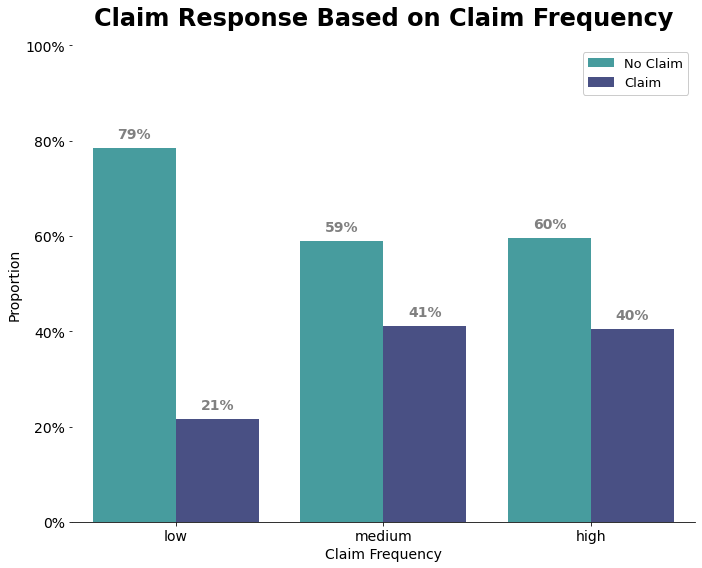

In [ ]:
plt.figure(figsize = (10, 8))

# plot proportion
ax = sns.barplot(
    x = 'CLAIM_FREQ_GROUP',
    y = 'percentage',
    hue = 'CLAIM_FLAG',
    order = clmfreq_distribution.iloc[clmfreq_distribution[clmfreq_distribution['CLAIM_FLAG'] == 1]['clmfreq_num'].sort_values(ascending = True).index]['CLAIM_FREQ_GROUP'],
    palette = 'mako_r',
    data = clmfreq_distribution
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True)
L.get_texts()[0].set_text('No Claim')
L.get_texts()[1].set_text('Claim')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

y_ = [x for x in range(0, 120, 20)]
plt.yticks(y_)

plt.xlabel('Claim Frequency', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels)

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14) 

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + '%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 14,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.title('Claim Response Based on Claim Frequency', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)

plt.tight_layout()

### Response MVR_PTS to Feature Target

In [ ]:
data_eda['MVR_PTS'].value_counts()

0     4658
1     1467
2     1199
3      966
4      727
5      528
6      341
7      213
8      114
9       53
10      20
11      13
13       2
12       1
Name: MVR_PTS, dtype: int64

In [ ]:
def group_mvrpts(x):
    if x['MVR_PTS'] == 0:
        risk = 'Very Low Risk'
    elif x['MVR_PTS'] == 1:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 2:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 3:
        risk = 'Low Risk'
    elif x['MVR_PTS'] == 4:
        risk = 'Minor Risk'
    elif x['MVR_PTS'] == 5:
        risk = 'Minor Risk'
    elif x['MVR_PTS'] == 6:
        risk = 'Borderline Risk'
    elif x['MVR_PTS'] == 7:
        risk = 'Borderline Risk'
    elif x['MVR_PTS'] == 8:
        risk = 'Medium Risk'
    elif x['MVR_PTS'] == 9:
        risk = 'Medium Risk'
    else:
        risk = 'High Risk'
    return risk

In [ ]:
data_eda['MVR_PTS_GROUP'] = data_eda.apply(lambda x: group_mvrpts(x), axis = 1)

In [ ]:
data_eda['MVR_PTS_GROUP'].value_counts()

Very Low Risk      4658
Low Risk           3632
Minor Risk         1255
Borderline Risk     554
Medium Risk         167
High Risk            36
Name: MVR_PTS_GROUP, dtype: int64

In [ ]:
mvrpts_distribution = data_eda.groupby(['MVR_PTS_GROUP', 'CLAIM_FLAG']).count()[['ID']]

mvrpts = data_eda.groupby(['MVR_PTS_GROUP']).count()[['ID']]

mvrpts_distribution['percentage'] = mvrpts_distribution.div(mvrpts, level = 'MVR_PTS_GROUP') * 100
mvrpts_distribution = mvrpts_distribution.reset_index()
mvrpts_distribution.columns = ['MVR_PTS_GROUP', 'CLAIM_FLAG', '#of Customers', 'percentage']
mvrpts_distribution

MVR_PTS_GROUP  CLAIM_FLAG  #of Customers  percentage
0   Borderline Risk           0            298   53.790614
1   Borderline Risk           1            256   46.209386
2         High Risk           0              6   16.666667
3         High Risk           1             30   83.333333
4          Low Risk           0           2639   72.659692
5          Low Risk           1            993   27.340308
6       Medium Risk           0             58   34.730539
7       Medium Risk           1            109   65.269461
8        Minor Risk           0            793   63.187251
9        Minor Risk           1            462   36.812749
10    Very Low Risk           0           3762   80.764277
11    Very Low Risk           1            896   19.235723

In [ ]:
df_mapping = pd.DataFrame({
'MVR_PTS_GROUP': ['Very Low Risk', 'Low Risk', 'Minor Risk', 'Borderline Risk', 'Medium Risk', 'High Risk'],
})
sort_mapping = df_mapping.reset_index().set_index('MVR_PTS_GROUP')

In [ ]:
mvrpts_distribution['mvrpts_num'] = mvrpts_distribution['MVR_PTS_GROUP'].map(sort_mapping['index'])

In [ ]:
mvrpts_distribution.sort_values('mvrpts_num')

MVR_PTS_GROUP  CLAIM_FLAG  #of Customers  percentage  mvrpts_num
10    Very Low Risk           0           3762   80.764277           0
11    Very Low Risk           1            896   19.235723           0
4          Low Risk           0           2639   72.659692           1
5          Low Risk           1            993   27.340308           1
8        Minor Risk           0            793   63.187251           2
9        Minor Risk           1            462   36.812749           2
0   Borderline Risk           0            298   53.790614           3
1   Borderline Risk           1            256   46.209386           3
6       Medium Risk           0             58   34.730539           4
7       Medium Risk           1            109   65.269461           4
2         High Risk           0              6   16.666667           5
3         High Risk           1             30   83.333333           5

In [ ]:
plotdata = pd.DataFrame({
    'Very Low Risk':[19, 81],
    'Low Risk':[27, 73],
    'Minor Risk':[37, 63],
    'Borderline Risk': [46, 54],
    'Medium Risk': [65, 35],
    'High Risk': [83, 17]
    }, 
    index=['Claim', 'No Claim']
)
plotdata.head()

Very Low Risk  Low Risk  ...  Medium Risk  High Risk
Claim                19        27  ...           65         83
No Claim             81        73  ...           35         17

[2 rows x 6 columns]

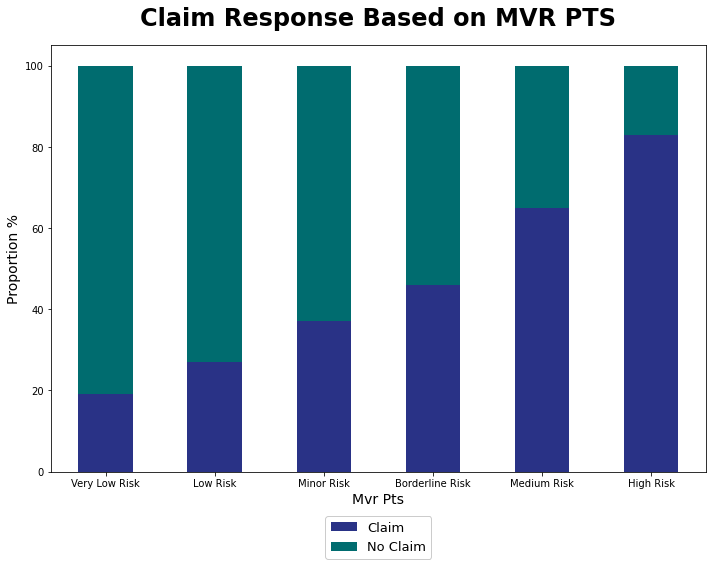

In [ ]:
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True, figsize = (10, 8), color = ['#293286', '#006C6F'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

L = plt.legend(fontsize = 13, frameon = True, loc = 'lower center', bbox_to_anchor=(0.5, -0.22))
L.get_texts()[0].set_text('Claim')
L.get_texts()[1].set_text('No Claim')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((1, 1, 1, 1))

plt.xticks(rotation = 0)

plt.title('Claim Response Based on MVR PTS', fontsize = 24, fontweight = 'semibold', ha = 'center', pad = 20)
plt.xlabel('Mvr Pts', fontsize = 14)
plt.ylabel('Proportion %', fontsize = 14)


plt.tight_layout()

#### Response to Car Attribute (Car Type, Car Use, Red Car, Car Age )

##### Car Type to Feature target and Others

In [ ]:
car_type = data.groupby(['CAR_TYPE', 'CLAIM_FLAG'])['ID'].count().reset_index()[['CAR_TYPE', 'CLAIM_FLAG', 'ID']]

car_type['total_customer'] = car_type.groupby(['CAR_TYPE'])['ID'].transform('sum')

car_type['percentage'] = car_type['ID']/car_type['total_customer']

car_type['percentage'] = [str(round(x*100))+" %" for x in car_type['percentage']]

car_type

CAR_TYPE  CLAIM_FLAG    ID  total_customer percentage
0       Minivan           0  2229            2694       83 %
1       Minivan           1   465            2694       17 %
2   Panel Truck           0   628             853       74 %
3   Panel Truck           1   225             853       26 %
4        Pickup           0  1217            1772       69 %
5        Pickup           1   555            1772       31 %
6           SUV           0  2042            2883       71 %
7           SUV           1   841            2883       29 %
8    Sports Car           0   771            1179       65 %
9    Sports Car           1   408            1179       35 %
10          Van           0   669             921       73 %
11          Van           1   252             921       27 %

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='CAR_TYPE', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=car_type, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['CAR_TYPE'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )
    
plt.title('Response to Car Type',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Car Type', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

#SUV
plt.text(-0.30, 410, s='841', fontsize=12, color = 'white', fontweight='bold');
plt.text(-0.30, 880, s='29%', fontsize=12, color = 'black');
plt.text(0.05, 1000, s='2042', fontsize=12, color = 'white', fontweight='bold');
plt.text(0.05, 2080, s='71%', fontsize=12, color = 'black');

#Pickup
plt.text(0.70, 270, s='555', fontsize=12, color = 'white', fontweight='bold');
plt.text(0.70, 590, s='31%', fontsize=12, color = 'black');
plt.text(1.05, 610, s='1217', fontsize=12, color = 'white', fontweight='bold');
plt.text(1.05, 1250, s='69%', fontsize=12, color = 'black');

#Minivan
plt.text(1.70, 230, s='465', fontsize=12, color = 'white', fontweight='bold');
plt.text(1.70, 490, s='17%', fontsize=12, color = 'black');
plt.text(2.05, 1115, s='2229', fontsize=12, color = 'white', fontweight='bold');
plt.text(2.05, 2250, s='83%', fontsize=12, color = 'black');

#Sports Car
plt.text(2.70, 200, s='408', fontsize=12, color = 'white', fontweight='bold');
plt.text(2.70, 448, s='35%', fontsize=12, color = 'black');
plt.text(3.08, 350, s='771', fontsize=12, color = 'white', fontweight='bold');
plt.text(3.08, 800, s='65%', fontsize=12, color = 'black');

#Van
plt.text(3.70, 110, s='252', fontsize=12, color = 'white', fontweight='bold');
plt.text(3.70, 290, s='27%', fontsize=12, color = 'black');
plt.text(4.08, 333, s='669', fontsize=12, color = 'white', fontweight='bold');
plt.text(4.08, 700, s='73%', fontsize=12, color = 'black');

#Panel Truck
plt.text(4.70, 100, s='225', fontsize=12, color = 'white', fontweight='bold');
plt.text(4.70, 265, s='26%', fontsize=12, color = 'black');
plt.text(5.08, 314, s='628', fontsize=12, color = 'white', fontweight='bold');
plt.text(5.08, 668, s='74%', fontsize=12, color = 'black');

plt.tight_layout();

In [ ]:
car_type1 = data.groupby(['CAR_TYPE', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['CAR_TYPE', 'CLAIM_FLAG', 'CLM_AMT']]

car_type1 = car_type1[car_type1['CLAIM_FLAG'] == 1]

car_type1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_TYPE', 
            y='CLM_AMT', 
            data=car_type1, 
            palette = 'mako_r',
           )


plt.title('Response Car Type to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Car Type', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_TYPE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Car Use to Feature target and Others

In [ ]:
car_use = data.groupby(['CAR_USE', 'CLAIM_FLAG'])['ID'].count().reset_index()[['CAR_USE', 'CLAIM_FLAG', 'ID']]

car_use['total_customer'] = car_use.groupby(['CAR_USE'])['ID'].transform('sum')

car_use['percentage'] = car_use['ID']/car_use['total_customer']

car_use['percentage'] = [str(round(x*100))+" %" for x in car_use['percentage']]

car_use

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_USE', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=car_use, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['CAR_USE'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )

plt.title('Response to Car Use',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Car Use', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.ylim(0,6000)

#Private
plt.text(-0.26, 650, s='1436', fontsize=15, color = 'white', fontweight='bold');
plt.text(-0.24, 1486, s='22%', fontsize=15, color = 'black');
plt.text(0.13, 2500, s='5077', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.15, 5127, s='78%', fontsize=15, color = 'black');

#Commercial
plt.text(0.74, 600, s='1310', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.75, 1360, s='35%', fontsize=15, color = 'black');
plt.text(1.14, 1180, s='2479', fontsize=15, color = 'white', fontweight='bold');
plt.text(1.15, 2529, s='65%', fontsize=15, color = 'black');

plt.tight_layout();

In [ ]:
car_use1 = data.groupby(['CAR_USE', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['CAR_USE', 'CLAIM_FLAG', 'CLM_AMT']]

car_use1 = car_use1[car_use1['CLAIM_FLAG'] == 1]

car_use1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='CAR_USE', 
            y='CLM_AMT', 
            data=car_use1, 
            palette = 'mako_r',
           )


plt.title('Response Car Use to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Car Use', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CAR_USE', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Red Car to Feature target and Others

In [ ]:
red_car = data.groupby(['RED_CAR', 'CLAIM_FLAG'])['ID'].count().reset_index()[['RED_CAR', 'CLAIM_FLAG', 'ID']]

red_car['total_customer'] = red_car.groupby(['RED_CAR'])['ID'].transform('sum')

red_car['percentage'] = red_car['ID']/red_car['total_customer']

red_car['percentage'] = [str(round(x*100))+" %" for x in red_car['percentage']]

red_car

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='RED_CAR', 
            y='ID', 
            hue='CLAIM_FLAG', 
            data=red_car, 
            palette = 'mako_r', 
            hue_order = [1, 0],
            order = pd.crosstab(data['RED_CAR'], data['CLAIM_FLAG']).sort_values(1, ascending = False).index
           )

plt.title('Response to Red Car',color='black',fontsize=20)
plt.ylabel('Total Customer', fontsize=13) # y axis label
plt.xlabel('Red Car', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.ylim(0,6000)

#No
plt.text(-0.27, 835, s='1968', fontsize=15, color = 'white', fontweight='bold');
plt.text(-0.26, 2008, s='27%', fontsize=15, color = 'black');
plt.text(0.13, 2750, s='5358', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.15, 5398, s='73%', fontsize=15, color = 'black');

#Yes
plt.text(0.75, 340, s='778', fontsize=15, color = 'white', fontweight='bold');
plt.text(0.75, 820, s='26%', fontsize=15, color = 'black');
plt.text(1.14, 1080, s='2198', fontsize=15, color = 'white', fontweight='bold');
plt.text(1.15, 2230, s='74%', fontsize=15, color = 'black');

plt.tight_layout();

In [ ]:
red_car1 = data.groupby(['RED_CAR', 'CLAIM_FLAG'])['CLM_AMT'].sum().reset_index()[['RED_CAR', 'CLAIM_FLAG', 'CLM_AMT']]

red_car1 = red_car1[red_car1['CLAIM_FLAG'] == 1]

red_car1

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='RED_CAR', 
            y='CLM_AMT', 
            data=red_car1, 
            palette = 'mako_r',
           )


plt.title('Response Red Car to Claim Amount',color='black',fontsize=20)
plt.ylabel('Total Claim', fontsize=13) # y axis label
plt.xlabel('Red Car', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='OLDCLAIM', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='INCOME', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='HOME_VAL', data=data, palette='mako_r',)
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='RED_CAR', y='BLUEBOOK', data=data, palette='mako_r',)
plt.xticks(rotation=45);

##### Car Age to Feature Target and Others

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data[data['CLAIM_FLAG'] == 1]['CAR_AGE'].dropna(), color= '#006C6F', label= 'CLAIM_FLAG: 1', ax=ax)
sns.kdeplot(data[data['CLAIM_FLAG'] == 0]['CAR_AGE'].dropna(), color= '#293286', label= 'CLAIM_FLAG: 0', ax=ax)

ax.set_ylabel('Density', fontsize=12) # y axis label
ax.set_xlabel('Car Age', fontsize=12) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(fontsize='medium')
ax.set_xlim(0, 40)

plt.title('Response to Car Age', fontsize=20)

## **Data Pre-Processing**

- Duplicate Data
- Normalization / Standardization
- Feature Encoding
- Missing Data
- Outliers
- Class Imbalance

### Duplicate Data

In [ ]:
print(data.duplicated().sum())
print(data.duplicated(subset='ID').sum())

1
1549


In [ ]:
print(data.duplicated().sum())
data_ad = data.drop_duplicates()
print(data_ad.duplicated().sum())

1
0


###Normalization / Standardization

Untuk kolom-kolom yang cenderung memiliki distribusi normal akan dilakukan standarisasi, sedangkan untuk kolom lainnya akan dilakukan normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data_ad['AGE_std'] = StandardScaler().fit_transform(data_ad['AGE'].values.reshape(len(data_ad), 1))
data_ad['HOMEKIDS_norm'] = MinMaxScaler().fit_transform(data_ad['HOMEKIDS'].values.reshape(len(data_ad), 1))
data_ad['KIDSDRIV_norm'] = MinMaxScaler().fit_transform(data_ad['KIDSDRIV'].values.reshape(len(data_ad), 1))
data_ad['YOJ_std'] = StandardScaler().fit_transform(data_ad['YOJ'].values.reshape(len(data_ad), 1))
data_ad['INCOME_std'] = StandardScaler().fit_transform(data_ad['INCOME'].values.reshape(len(data_ad), 1))
data_ad['HOME_VAL_norm'] = MinMaxScaler().fit_transform(data_ad['HOME_VAL'].values.reshape(len(data_ad), 1))
data_ad['TRAVTIME_std'] = StandardScaler().fit_transform(data_ad['TRAVTIME'].values.reshape(len(data_ad), 1))
data_ad['BLUEBOOK_std'] = StandardScaler().fit_transform(data_ad['BLUEBOOK'].values.reshape(len(data_ad), 1))
data_ad['TIF_norm'] = MinMaxScaler().fit_transform(data_ad['TIF'].values.reshape(len(data_ad), 1))
data_ad['OLDCLAIM_norm'] = MinMaxScaler().fit_transform(data_ad['OLDCLAIM'].values.reshape(len(data_ad), 1))
data_ad['CLM_FREQ_norm'] = MinMaxScaler().fit_transform(data_ad['CLM_FREQ'].values.reshape(len(data_ad), 1))
data_ad['MVR_PTS_norm'] = MinMaxScaler().fit_transform(data_ad['MVR_PTS'].values.reshape(len(data_ad), 1))
data_ad['CLM_AMT_norm'] = MinMaxScaler().fit_transform(data_ad['CLM_AMT'].values.reshape(len(data_ad), 1))
data_ad['CAR_AGE_std'] = StandardScaler().fit_transform(data_ad['CAR_AGE'].values.reshape(len(data_ad), 1))

In [ ]:
norm = ['AGE','HOMEKIDS', 'YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ', 'MVR_PTS', 'CLM_AMT','CAR_AGE', 'KIDSDRIV']
data_ans = data_ad.drop(columns=norm)

In [ ]:
data_ans.describe()

ID    CLAIM_FLAG  ...  CLM_AMT_norm   CAR_AGE_std
count  1.030100e+04  10301.000000  ...  10301.000000  9.662000e+03
mean   4.956841e+08      0.266576  ...      0.012263 -1.950374e-16
std    2.864735e+08      0.442190  ...      0.038341  1.000052e+00
min    6.317500e+04      0.000000  ...      0.000000 -1.977418e+00
25%    2.442710e+08      0.000000  ...      0.000000 -1.277379e+00
50%    4.970541e+08      0.000000  ...      0.000000 -5.231092e-02
75%    7.395301e+08      1.000000  ...      0.009290  6.477280e-01
max    9.999264e+08      1.000000  ...      1.000000  3.447884e+00

[8 rows x 16 columns]

### Feature Encoding

In [ ]:
data_ans['OCCUPATION'] = data_ans['OCCUPATION'].fillna('Blue Collar')

In [ ]:
for catt in cats:
    onehots = pd.get_dummies(data_ans[catt], prefix=catt)
    data_ans = data_ans.join(onehots)

In [ ]:
data_afe = data_ans.copy()

In [ ]:
data_afe = data_afe.drop(['PARENT1', 'PARENT1_No','MSTATUS','MSTATUS_No','GENDER',
                  'GENDER_F','RED_CAR','RED_CAR_no','REVOKED','REVOKED_No',
                  'CAR_TYPE', 'CAR_USE_Commercial','CAR_USE','EDUCATION',
                  'OCCUPATION'], axis=1)
data_afe.sample(3)

ID  CLAIM_FLAG   AGE_std  ...  CAR_TYPE_Van  RED_CAR_yes  REVOKED_Yes
4998  228437432           0 -0.329756  ...             0            0            0
2919  316675115           0 -0.097367  ...             0            0            1
2872  996829275           0  0.599801  ...             0            0            0

[3 rows x 40 columns]

### Missing Data

In [ ]:
data_afe.columns[data_afe.isna().any()]

Index(['AGE_std', 'YOJ_std', 'INCOME_std', 'HOME_VAL_norm', 'CAR_AGE_std'], dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_afe = pd.DataFrame(imputer.fit_transform(data_afe),columns = data_afe.columns)

In [ ]:
data_afe.isna().any()

ID                         False
CLAIM_FLAG                 False
AGE_std                    False
HOMEKIDS_norm              False
KIDSDRIV_norm              False
YOJ_std                    False
INCOME_std                 False
HOME_VAL_norm              False
TRAVTIME_std               False
BLUEBOOK_std               False
TIF_norm                   False
OLDCLAIM_norm              False
CLM_FREQ_norm              False
MVR_PTS_norm               False
CLM_AMT_norm               False
CAR_AGE_std                False
PARENT1_Yes                False
MSTATUS_Yes                False
GENDER_M                   False
EDUCATION_Bachelors        False
EDUCATION_High School      False
EDUCATION_Masters          False
EDUCATION_PhD              False
OCCUPATION_Blue Collar     False
OCCUPATION_Clerical        False
OCCUPATION_Doctor          False
OCCUPATION_Home Maker      False
OCCUPATION_Lawyer          False
OCCUPATION_Manager         False
OCCUPATION_Professional    False
OCCUPATION

In [ ]:
data_amd = data_afe.copy()

###Outliers

In [ ]:
nums_new =['KIDSDRIV_norm','HOMEKIDS_norm', 'CLM_FREQ_norm', 'MVR_PTS_norm', 'CLAIM_FLAG' , 'AGE_std' , 
           'YOJ_std','INCOME_std', 'HOME_VAL_norm','TRAVTIME_std','BLUEBOOK_std','TIF_norm',
           'TIF_norm', 'OLDCLAIM_norm', 'CLM_AMT_norm','CAR_AGE_std']

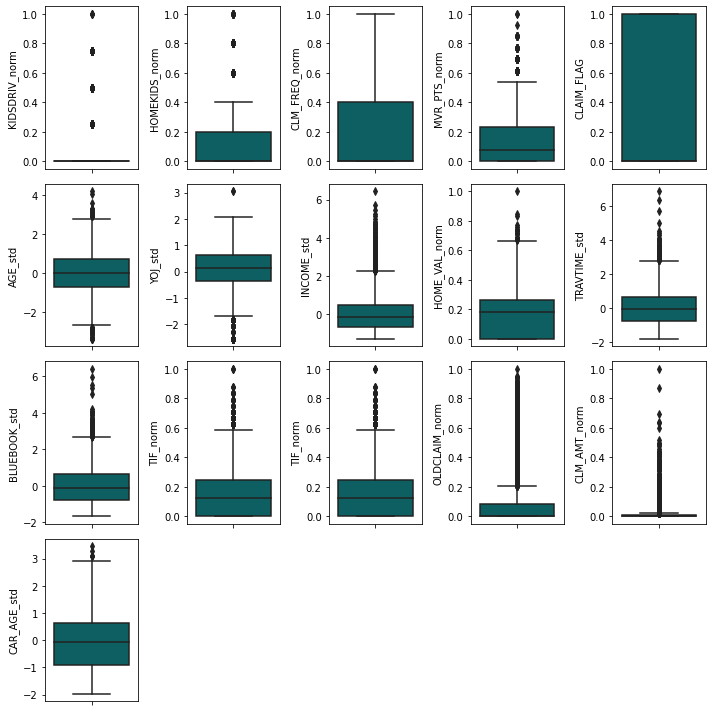

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(nums_new)):
    plt.subplot(4, len(nums_new)/3, i+1)
    sns.boxplot(y=data_amd[nums_new[i]], color='#006C6F', orient='v')
    plt.tight_layout()

In [ ]:
out =['KIDSDRIV_norm','HOMEKIDS_norm', 'CLM_FREQ_norm', 'MVR_PTS_norm', 'AGE_std' , 'YOJ_std','INCOME_std', 'HOME_VAL_norm','TRAVTIME_std','BLUEBOOK_std','TIF_norm','TIF_norm', 'OLDCLAIM_norm', 'CLM_AMT_norm','CAR_AGE_std']

In [ ]:
len(data_amd)

10301

In [ ]:
filtered_entries = np.array([True] * len(data_amd))
for col in nums_new:
  Q1 = data_amd[col].quantile(0.25)
  Q3 = data_amd[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit = Q3 + (IQR * 1.5)

  filtered_entries = ((data_amd[col] >= low_limit) & (data_amd[col] <= high_limit)) & filtered_entries
    
data_amd = data_amd[filtered_entries]

In [ ]:
data_aout = data_amd.copy()
len(data_aout)

5412

### Class Imbalance

In [ ]:
data_aout['CLAIM_FLAG'].value_counts()

0.0    5022
1.0     390
Name: CLAIM_FLAG, dtype: int64

In [ ]:
X = data_aout[[col for col in data_aout.columns if (str(data_aout[col].dtype) != 'object') and col not in ['ID','CLAIM_FLAG']]]
y = data_aout['CLAIM_FLAG'].values

print(X.shape)
print(y.shape)

(5412, 38)
(5412,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_SMOTE).value_counts())

0.0    5022
1.0     390
dtype: int64
0.0    780
1.0    390
dtype: int64
0.0    5022
1.0    2511
dtype: int64
1.0    5022
0.0    5022
dtype: int64


### Split Train Test Data

####SETELAH OUTLIER DI-DROP

In [ ]:
X = data_aout.drop(columns=['ID', 'CLAIM_FLAG','CLM_AMT_norm', 'KIDSDRIV_norm'])
y = data_aout['CLAIM_FLAG']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3788, 36) (1624, 36) (3788,) (1624,)


##### Mengatasi Class Imbalance pada Data Train yang sudah di-split

In [ ]:
data_aout['CLAIM_FLAG'].value_counts()

0.0    5022
1.0     390
Name: CLAIM_FLAG, dtype: int64

In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_SMOTE).value_counts())

0.0    3514
1.0     274
Name: CLAIM_FLAG, dtype: int64
0.0    548
1.0    274
dtype: int64
0.0    3514
1.0    1757
dtype: int64
1.0    3514
0.0    3514
dtype: int64


In [ ]:
array_X_train =  X_train.values
array_X_test = X_test.values
array_y_train = y_train.values
array_y_test = y_test.values

####DATA SEBELUM OUTLIER

In [ ]:
X1 = data_afe.drop(columns=['ID', 'CLAIM_FLAG','CLM_AMT_norm', 'KIDSDRIV_norm'])
y1 = data_afe['CLAIM_FLAG']

from sklearn.model_selection import train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(7210, 36) (3091, 36) (7210,) (3091,)


In [ ]:
from imblearn import under_sampling, over_sampling
X1_under, y1_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X1_train, y1_train)
X1_over, y1_over = over_sampling.RandomOverSampler(0.5).fit_resample(X1_train, y1_train)
X1_over_SMOTE, y1_over_SMOTE = over_sampling.SMOTE().fit_resample(X1_train, y1_train)

In [ ]:
print(pd.Series(y1_train).value_counts())
print(pd.Series(y1_under).value_counts())
print(pd.Series(y1_over).value_counts())
print(pd.Series(y1_over_SMOTE).value_counts())

0.0    5264
1.0    1946
Name: CLAIM_FLAG, dtype: int64
0.0    3892
1.0    1946
dtype: int64
0.0    5264
1.0    2632
dtype: int64
1.0    5264
0.0    5264
dtype: int64


In [ ]:
array_X1_train =  X1_train.values
array_X1_test = X1_test.values
array_y1_train = y1_train.values
array_y1_test = y1_test.values

## **Clasification Modeling and Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### **1.  K-Nearest Neighbor**

In [ ]:
# Menentukan nilai K
n = 3788
k = (n**0.5)
print(k)

61.54673021371647


#### **Outlier tidak di-drop**

#####TRAIN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    3050
1.0      41
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_train, X1_test, y1_train, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.66
Recall (Test Set): 0.03
F1-Score (Test Set): 0.06
AUC: 0.51


In [ ]:
print('Train score: ' + str(knn.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.7414701803051318
Test score:0.7453898414752508


MODERATE

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_train, y1_train)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_train, X1_test, y1_train, y1_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.49
Recall (Test Set): 0.20
F1-Score (Test Set): 0.28
AUC: 0.56


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 7
Best p: 1
Best algorithm: brute


In [ ]:
print('Train score: ' + str(modelknn.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 0.4588652482269504
Test score:0.279319606087735


Overfitting!

#####SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_over_SMOTE, y1_over_SMOTE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 1., 1., ..., 1., 1., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

1.0    1616
0.0    1475
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_over_SMOTE, X1_test, y1_over_SMOTE, y1_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.36
Recall (Test Set): 0.73
F1-Score (Test Set): 0.48
AUC: 0.64


In [ ]:
print('Train score: ' + str(knn.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.6780015197568389
Test score:0.5949530896150114


UNDERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_over_SMOTE, y1_over_SMOTE)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_over_SMOTE, X1_test, y1_over_SMOTE, y1_test)

Accuracy (Test Set): 0.61
Precision (Test Set): 0.35
Recall (Test Set): 0.58
F1-Score (Test Set): 0.43
AUC: 0.60


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 2
Best algorithm: kd_tree


In [ ]:
print('Train score: ' + str(modelknn.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.4334423166744512


UNDERFITING!

#####UNDER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_under, y1_under)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    2943
1.0     148
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_under, X1_test, y1_under, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.57
Recall (Test Set): 0.11
F1-Score (Test Set): 0.18
AUC: 0.54


In [ ]:
print('Train score: ' + str(knn.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.698526892771497
Test score:0.7483015205435134


OVERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_under, y1_under)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_under, X1_test, y1_under, y1_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.46
Recall (Test Set): 0.30
F1-Score (Test Set): 0.36
AUC: 0.59


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 7
Best p: 1
Best algorithm: brute


In [ ]:
print('Train score: ' + str(modelknn.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 0.548051948051948
Test score:0.3604562737642586


UNDERFITING!

#####OVER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_over, y1_over)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    2888
1.0     203
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_over, X1_test, y1_over, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.57
Recall (Test Set): 0.14
F1-Score (Test Set): 0.23
AUC: 0.55


In [ ]:
print('Train score: ' + str(knn.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.7026342451874367
Test score:0.7505661598188289


UNDERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_over, y1_over)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_over, X1_test, y1_over, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.57
Recall (Test Set): 0.11
F1-Score (Test Set): 0.19
AUC: 0.54


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 89
Best p: 3
Best algorithm: brute


In [ ]:
print('Train score: ' + str(modelknn.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.18789144050104384


UNDERFITING!

#### **Outlier di-drop**

##### **Menggunakan SMOTE**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X_over_SMOTE, y_over_SMOTE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y_pred).value_counts())

1.0    829
0.0    795
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.53
Precision (Test Set): 0.11
Recall (Test Set): 0.78
F1-Score (Test Set): 0.19
AUC: 0.64


In [ ]:
print('Train score: ' + str(knn.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.7228229937393283
Test score:0.5289408866995073


######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.13
Recall (Test Set): 0.32
F1-Score (Test Set): 0.19
AUC: 0.58


In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 7
Best p: 1
Best algorithm: brute


In [ ]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9347710330138445
Test score:0.18686868686868688


Overfitting!

#####**Menggunakan OVERSAMPLING**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn2 = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn2.fit(X_over, y_over)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = knn2.predict(X_test)
y_pred2

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y_pred2).value_counts())

0.0    1465
1.0     159
dtype: int64


In [ ]:
eval_classification(knn2, y_pred2, X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.16
Recall (Test Set): 0.22
F1-Score (Test Set): 0.19
AUC: 0.57


In [ ]:
print('Train score: ' + str(knn2.score(X_over, y_over))) #accuracy
print('Test score:' + str(knn2.score(X_test, y_test))) #accuracy

Train score: 0.7283247960538797
Test score:0.8626847290640394


Underfitting!

#####**Menggunakan UNDERSAMPLING**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn3 = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn3.fit(X_under, y_under)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

In [ ]:
y_pred3 = knn3.predict(X_test)
y_pred3

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y_pred3).value_counts())

0.0    1567
1.0      57
dtype: int64


In [ ]:
eval_classification(knn3, y_pred3, X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.19
Recall (Test Set): 0.09
F1-Score (Test Set): 0.13
AUC: 0.53


In [ ]:
print('Train score: ' + str(knn3.score(X_under, y_under))) #accuracy
print('Test score:' + str(knn3.score(X_test, y_test))) #accuracy

Train score: 0.6800486618004866
Test score:0.9070197044334976


Underfitting!

### **2. Logistic Regression**




####**Outlier tidak di-drop**

#####TRAIN

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    2716
1.0     375
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.29
F1-Score (Test Set): 0.40
AUC: 0.62


In [ ]:
print('data train : ', model.score(X1_train,y1_train))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.764632454923717
data test :  0.7712714331931414


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_train, y1_train)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.29
F1-Score (Test Set): 0.40
AUC: 0.62


In [ ]:
print('data train : ', model.score(X1_train,y1_train))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.764632454923717
data test :  0.7712714331931414


#####UNDER

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_under, y1_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    2515
1.0     576
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.58
Recall (Test Set): 0.42
F1-Score (Test Set): 0.48
AUC: 0.66


In [ ]:
print('data train : ', model.score(X1_under, y1_under))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7355258650222679
data test :  0.7703008735037205


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_under, y1_under)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.58
Recall (Test Set): 0.42
F1-Score (Test Set): 0.48
AUC: 0.66


In [ ]:
print('data train : ', model.score(X1_under, y1_under))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7355258650222679
data test :  0.7703008735037205


#####OVER

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_over, y1_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    2520
1.0     571
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.57
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
print('data train : ', model.score(X1_over, y1_over))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7341691995947315
data test :  0.7680362342284051


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_over, y1_over)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.57
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
print('data train : ', model.score(X1_over, y1_over))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7341691995947315
data test :  0.7680362342284051


#####SMOTE

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr_SMOTE = LogisticRegression(random_state=42)
model_lr_SMOTE.fit(X1_over_SMOTE, y1_over_SMOTE)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model_lr_SMOTE.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    1838
1.0    1253
dtype: int64

In [ ]:
eval_classification(model_lr_SMOTE, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.71
F1-Score (Test Set): 0.55
AUC: 0.70


In [ ]:
print('data train : ', model_lr_SMOTE.score(X1_over_SMOTE, y1_over_SMOTE))
print('data test : ', model_lr_SMOTE.score(X1_test,y1_test))

data train :  0.695573708206687
data test :  0.7026852151407311


Feature: 0, Score: -0.01375
Feature: 1, Score: 0.62004
Feature: 2, Score: -0.04015
Feature: 3, Score: -0.15864
Feature: 4, Score: -1.14535
Feature: 5, Score: 0.11815
Feature: 6, Score: -0.16347
Feature: 7, Score: -1.37434
Feature: 8, Score: -0.76738
Feature: 9, Score: 1.63524
Feature: 10, Score: 1.89553
Feature: 11, Score: 0.00217
Feature: 12, Score: 0.32488
Feature: 13, Score: -0.35912
Feature: 14, Score: -0.03695
Feature: 15, Score: -0.06672
Feature: 16, Score: 0.24546
Feature: 17, Score: -0.05834
Feature: 18, Score: -0.07917
Feature: 19, Score: 0.27162
Feature: 20, Score: 0.06701
Feature: 21, Score: 0.09515
Feature: 22, Score: -0.11830
Feature: 23, Score: 0.20463
Feature: 24, Score: -0.39892
Feature: 25, Score: 0.09114
Feature: 26, Score: -0.17108
Feature: 27, Score: -0.65638
Feature: 28, Score: -0.53285
Feature: 29, Score: 0.15541
Feature: 30, Score: -0.12907
Feature: 31, Score: 0.13051
Feature: 32, Score: 0.35657
Feature: 33, Score: 0.06067
Feature: 34, Score: 0.11892
Feature: 35,

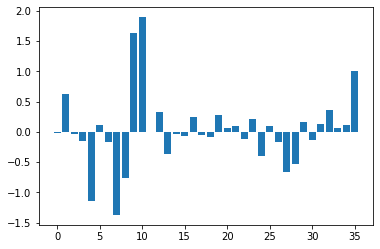

In [ ]:
from matplotlib import pyplot
importance = model_lr_SMOTE.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

Text(0.5, 1.0, 'feature importance score')

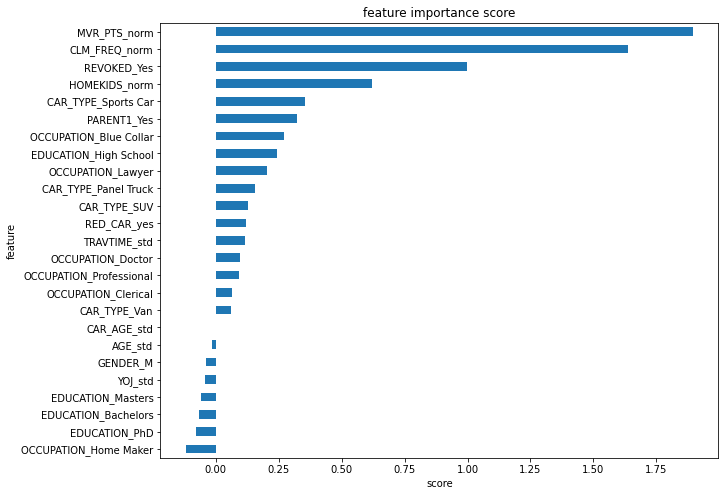

In [ ]:
feat_importances = pd.Series(model_lr_SMOTE.coef_[0], index=X1.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_over_SMOTE, y1_over_SMOTE)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.71
F1-Score (Test Set): 0.55
AUC: 0.70


In [ ]:
print('data train : ', modellog.score(X1_over_SMOTE, y1_over_SMOTE))
print('data test : ', modellog.score(X1_test,y1_test))

data train :  0.677132978226334
data test :  0.5171281088690756


####**Outlier didrop**

##### **Tanpa Menggunakan Class Imbalance**

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    1623
1.0       1
dtype: int64

In [ ]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [ ]:
print('data train : ', model.score(X_train,y_train))
print('data test : ', model.score(X_test,y_test))

data train :  0.92740232312566
data test :  0.9279556650246306


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
model = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='accuracy')

#Fitting model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [ ]:
print('data train : ', model.score(X_train,y_train))
print('data test : ', model.score(X_test,y_test))

data train :  0.9276663146779303
data test :  0.9285714285714286


#####**Menggunakan SMOTE**

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
modelSMOTE = LogisticRegression(random_state=42)
modelSMOTE.fit(X_over_SMOTE, y_over_SMOTE)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = modelSMOTE.predict(X_test)
pd.Series(y_pred).value_counts()

0.0    1084
1.0     540
dtype: int64

In [ ]:
eval_classification(modelSMOTE, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.14
Recall (Test Set): 0.64
F1-Score (Test Set): 0.23
AUC: 0.66


In [ ]:
print('data train : ', modelSMOTE.score(X_over_SMOTE,y_over_SMOTE))
print('data test : ', modelSMOTE.score(X_test,y_test))

data train :  0.7068867387592487
data test :  0.687192118226601


######Hypertuning Parameter

**Menggunakan SMOTE**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modelSMOTE = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='accuracy')

#Fitting model
modelSMOTE.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = modelSMOTE.predict(X_test)
eval_classification(modelSMOTE, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.13
Recall (Test Set): 0.63
F1-Score (Test Set): 0.21
AUC: 0.65


In [ ]:
print('data train : ', modelSMOTE.score(X_over_SMOTE,y_over_SMOTE))
print('data test : ', modelSMOTE.score(X_test,y_test))

data train :  0.6760102447353443
data test :  0.6699507389162561


Ini modelnya bagus moderate tidak under/overfiting

#####**Menggunakan Undersampling**

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_under = LogisticRegression(random_state=42)
model_under.fit(X_under, y_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model_under.predict(X_test)
pd.Series(y_pred).value_counts()

0.0    1405
1.0     219
dtype: int64

In [ ]:
eval_classification(model_under, y_pred, X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.20
Recall (Test Set): 0.38
F1-Score (Test Set): 0.26
AUC: 0.63


In [ ]:
print('data train : ', model_under.score(X_under,y_under))
print('data test : ', model_under.score(X_test,y_test))

data train :  0.718978102189781
data test :  0.8479064039408867


######Hypertuning Parameter

**Menggunakan undersampling**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
model_under = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
model_under.fit(X_under, y_under)
y_pred = model_under.predict(X_test)
eval_classification(model_under, y_pred, X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [ ]:
print('data train : ', model_under.score(X_under,y_under))
print('data test : ', model_under.score(X_test,y_test))

data train :  0.6666666666666666
data test :  0.9285714285714286


#####**Menggunakan Oversampling**

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_over = LogisticRegression(random_state=42)
model_over.fit(X_over, y_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model_over.predict(X_test)
pd.Series(y_pred).value_counts()

0.0    1410
1.0     214
dtype: int64

In [ ]:
eval_classification(model_over, y_pred, X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.21
Recall (Test Set): 0.38
F1-Score (Test Set): 0.27
AUC: 0.63


In [ ]:
print('data train : ', model_over.score(X_over,y_over))
print('data test : ', model_over.score(X_test,y_test))

data train :  0.7271864921267311
data test :  0.8509852216748769


######Hypertuning Parameter

**Menggunakan Oversampling**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
model_over = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
model_over.fit(X_over, y_over)
y_pred = model_over.predict(X_test)
eval_classification(model_over, y_pred, X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.29
Recall (Test Set): 0.05
F1-Score (Test Set): 0.09
AUC: 0.52


In [ ]:
print('data train : ', model_over.score(X_over,y_over))
print('data test : ', model_over.score(X_test,y_test))

data train :  0.6888635932460634
data test :  0.9230295566502463


### **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

####**Outlier tidak di-drop**

#####TRAIN

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(model, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.39
Recall (Test Set): 0.42
F1-Score (Test Set): 0.40
AUC: 0.59


In [ ]:
print('Train score: ' + str(model.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(model.score(X1_test, y1_test))) #accuracy

Train score: 0.7300970873786408
Test score:0.7411840828210935


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_train, y1_train)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.41
Recall (Test Set): 0.37
F1-Score (Test Set): 0.39
AUC: 0.59


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_train, y1_train)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.7839472237493129
Test score:0.3896961690885073


#####UNDER

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_under,y1_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(model, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.37
Recall (Test Set): 0.48
F1-Score (Test Set): 0.42
AUC: 0.60


In [ ]:
print('Train score: ' + str(model.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(model.score(X1_test, y1_test))) #accuracy

Train score: 0.7995514437903001
Test score:0.3896961690885073


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_under, y1_under)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.46
Recall (Test Set): 0.50
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 83
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_under, y1_under)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.5887185104052575
Test score:0.4777376654632972


#####OVER

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_over,y1_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(model, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.39
Recall (Test Set): 0.42
F1-Score (Test Set): 0.41
AUC: 0.60


In [ ]:
print('Train score: ' + str(model.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(model.score(X1_test, y1_test))) #accuracy

Train score: 0.5819051414906337
Test score:0.4777376654632972


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_over, y1_over)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.40
Recall (Test Set): 0.37
F1-Score (Test Set): 0.39
AUC: 0.59


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_over, y1_over)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.8359976317347543
Test score:0.38701298701298703


#####SMOTE

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_over_SMOTE,y1_over_SMOTE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(model, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.39
Recall (Test Set): 0.43
F1-Score (Test Set): 0.41
AUC: 0.60


In [ ]:
print('Train score: ' + str(model.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(model.score(X1_test, y1_test))) #accuracy

Train score: 0.767583084906702
Test score:0.38701298701298703


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_over_SMOTE, y1_over_SMOTE)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.42
Recall (Test Set): 0.59
F1-Score (Test Set): 0.49
AUC: 0.66


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_over_SMOTE, y1_over_SMOTE)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.7759049461177122
Test score:0.493723849372385


####**Outlier di-drop**

#####**Menggunakan data SMOTE**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_over_SMOTE,y_over_SMOTE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = dt.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.10
Recall (Test Set): 0.15
F1-Score (Test Set): 0.12
AUC: 0.52


In [ ]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.7981497056349873
Test score:0.23076923076923078


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.17
Recall (Test Set): 0.23
F1-Score (Test Set): 0.20
AUC: 0.57


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 34
Best min_samples_split: 10
Best min_samples_leaf: 4
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.992431687997178
Test score:0.6099338013354065


#####**Menggunakan Undersampling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_under, y_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt1.predict(X_test)
eval_classification(model, y1_pred, X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.09
Recall (Test Set): 0.39
F1-Score (Test Set): 0.15
AUC: 0.54


In [ ]:
print('Train score: ' + str(dt1.score(X_under, y_under)))
print('Test score:' + str(dt1.score(X_test, y_test)))

Train score: 1.0
Test score:0.6773399014778325


#####**Menggunakan Oversampling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y2_pred = dt2.predict(X_test)
eval_classification(model, y2_pred, X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.08
Recall (Test Set): 0.09
F1-Score (Test Set): 0.08
AUC: 0.51


In [ ]:
print('Train score: ' + str(dt2.score(X_over, y_over)))
print('Test score:' + str(dt2.score(X_test, y_test)))

Train score: 1.0
Test score:0.8651477832512315


### **4. Ensemble Methods**

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

Menggunakan SMOTE karena dari keseluruhan 3 model diatas, model yang bagus untuk di-Train adalah data yang sudah di Class Imbalance

####**Outlier tidak di-Drop**

##### Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=12) #Tunning Maxdepth
rf.fit(X1_over_SMOTE,y1_over_SMOTE)

y1_pred = rf.predict(X1_test)
eval_classification(rf, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.53
Recall (Test Set): 0.51
F1-Score (Test Set): 0.52
AUC: 0.67


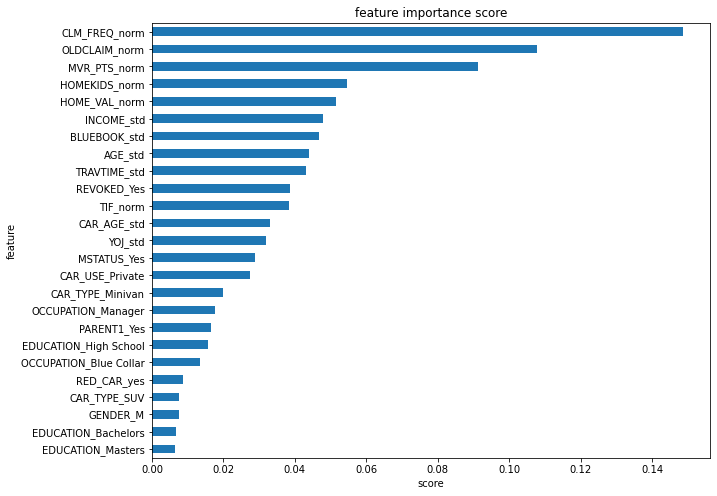

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree --
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(1, 10, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='f1')
rf_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = rf_tuned.predict(X1_test)#Check performa dari model
eval_classification(rf_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.51
Recall (Test Set): 0.56
F1-Score (Test Set): 0.53
AUC: 0.69


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 10
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


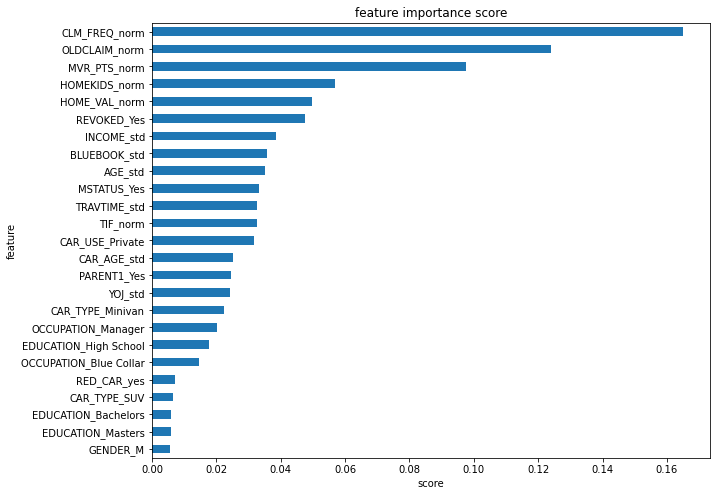

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

#####Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X1_over_SMOTE,y1_over_SMOTE)

y1_pred = ab.predict(X1_test)
eval_classification(ab, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.53
Recall (Test Set): 0.57
F1-Score (Test Set): 0.55
AUC: 0.69


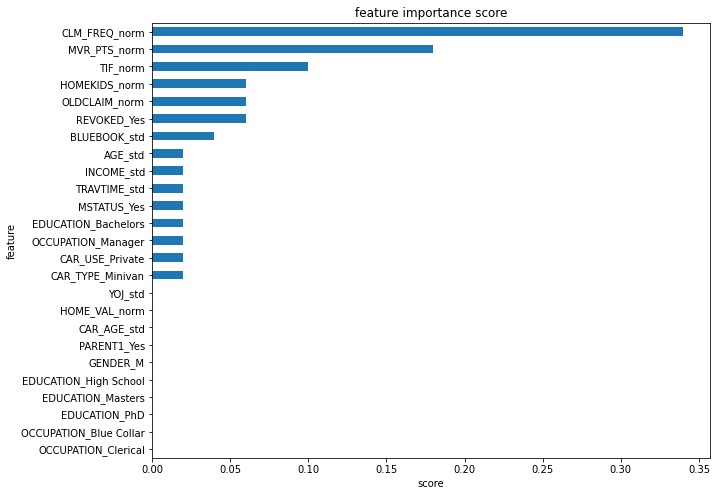

In [ ]:
show_feature_importance(ab)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='f1')
ab_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = ab_tuned.predict(X1_test)#Check performa dari model
eval_classification(ab_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.51
Recall (Test Set): 0.58
F1-Score (Test Set): 0.55
AUC: 0.69


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 800
Best learning_rate: 0.06873684210526315
Best algorithm: SAMME.R


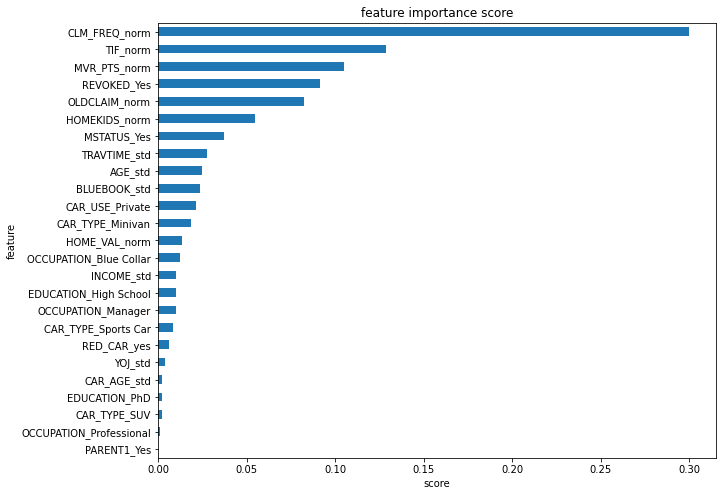

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

#####Boosting: XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X1_over_SMOTE, y1_over_SMOTE)

y1_pred = xg.predict(array_X1_test)
eval_classification(xg, y1_pred, X1_over_SMOTE, y1_over_SMOTE, array_X1_test, array_y1_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.59
Recall (Test Set): 0.47
F1-Score (Test Set): 0.52
AUC: 0.68


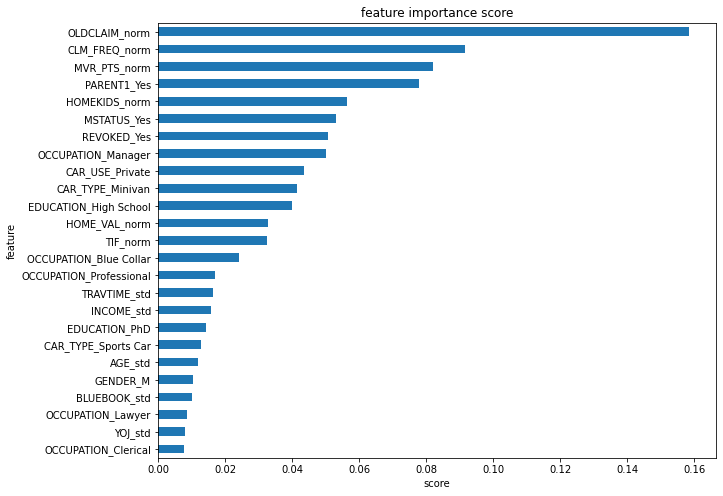

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='f1')
xg_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = xg_tuned.predict(array_X1_test)#Check performa dari model
eval_classification(xg_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, array_X1_test, array_y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.58
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


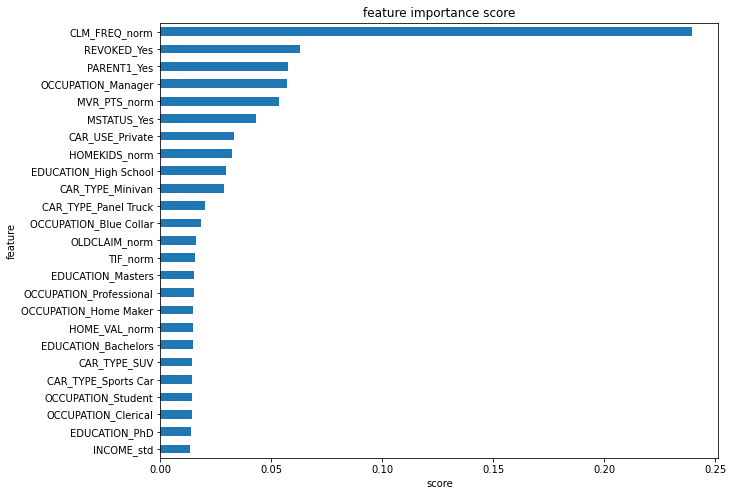

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

#####Choosing the baseline

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

def algorithm_pipeline(X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test, model, hyperparameters, cv=5, scoring_fit='recall', scoring_test=recall_score): #
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X1_over_SMOTE, y1_over_SMOTE)
    best_model = rs.best_estimator_
    
    pred = rs.predict(array_X1_test)
    score = scoring_test(array_y1_test, pred)
    return [best_model, pred, score]

In [ ]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

KeyboardInterrupt: ignored

In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

In [ ]:
models_preds_scores

Stacking

In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=4.281332398719396)))
level1.append(('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=31.0, max_features=25, min_samples_leaf=0.4, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.05831578947368421, n_estimators=200, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, gpu_id=0,
                importance_type='gain',
                learning_rate=0.13131313, max_delta_step=0, max_depth=90,
                min_child_weight=6,
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
                reg_alpha=0.300000012, reg_lambda=0, scale_pos_weight=1,
                subsample=1, tree_method='hist', validate_parameters=1,
                verbosity=0)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X1_over_SMOTE, y1_over_SMOTE)
y1_pred = stacking_model.predict(array_X1_test)#Check performa dari model
eval_classification(stacking_model, y1_pred, X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test)

####**Outlier di-Drop**

##### Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='f1')
rf_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y1_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

#####Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_feature_importance(ab)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='f1')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

#####Boosting: XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(array_X_test)
eval_classification(xg, y_pred, X_over_SMOTE, y_over_SMOTE, array_X_test, array_y_test)

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='f1')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = xg_tuned.predict(array_X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, array_X_test, array_y_test)

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

#####Choosing the baseline

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

def algorithm_pipeline(X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test, model, hyperparameters, cv=5, scoring_fit='f1', scoring_test=f1_score): #
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_over_SMOTE, y_over_SMOTE)
    best_model = rs.best_estimator_
    
    pred = rs.predict(array_X_test)
    score = scoring_test(array_y_test, pred)
    return [best_model, pred, score]

In [ ]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_over_SMOTE, array_X_test, y_over_SMOTE, array_y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

In [ ]:
models_preds_scores

Stacking

In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=4.281332398719396)))
level1.append(('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=31.0, max_features=25, min_samples_leaf=0.4, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.05831578947368421, n_estimators=200, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, gpu_id=0,
                importance_type='gain',
                learning_rate=0.13131313, max_delta_step=0, max_depth=90,
                min_child_weight=6,
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
                reg_alpha=0.300000012, reg_lambda=0, scale_pos_weight=1,
                subsample=1, tree_method='hist', validate_parameters=1,
                verbosity=0)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = stacking_model.predict(array_X_test)#Check performa dari model
eval_classification(stacking_model, y_pred, X_over_SMOTE, array_X_test, y_over_SMOTE, array_y_test)